# Begin Machine Learning on hdb_merged_ohe train file 

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
sns.set_style('white')
%config InlineBackend.figure_format = 'retina'
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression, RidgeCV,LassoCV,ElasticNetCV

In [5]:
hdb_merged_ohe_train = pd.read_csv('../datasets/cleaned_ml_train.csv')

In [3]:
#find out features multicolinearity for hdb_merged_ohe

X = hdb_merged_ohe_train

# # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# # calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
					for i in range(len(X.columns))]

In [4]:
#intepretating VIF scores - 1 = not correlated, Between 1 and 5 = moderately correlated , Greater than 5 = highly correlated.

pd.set_option('display.max_rows',90)
vif=vif_data.round(1)
vif

feature    VIF
0                 resale_price   73.8
1                           id   11.8
2              floor_area_sqft  253.3
3                      hdb_age   21.9
4        mall_nearest_distance    5.9
5      hawker_nearest_distance   15.1
6         mrt_nearest_distance    6.6
7    bus_stop_nearest_distance    5.5
8     pri_sch_nearest_distance    4.9
9         sec_sch_nearest_dist    4.9
10               max_floor_lvl   20.0
11                  town_BEDOK    2.4
12                 town_BISHAN    1.5
13            town_BUKIT BATOK    2.3
14            town_BUKIT MERAH    2.0
15          town_BUKIT PANJANG    2.2
16            town_BUKIT TIMAH    1.1
17           town_CENTRAL AREA    1.4
18          town_CHOA CHU KANG    4.3
19               town_CLEMENTI    1.6
20                town_GEYLANG    1.6
21                town_HOUGANG    2.3
22            town_JURONG EAST    1.6
23            town_JURONG WEST    3.3
24        town_KALLANG/WHAMPOA    1.8
25          town_MARINE PARADE    1.3
26              town_PASIR RIS    2.1
27                town_PUNGGOL    6.2
28             town_QUEENSTOWN    1.8
29              town_SEMBAWANG    2.3
30               town_SENGKANG    4.7
31              town_SERANGOON    1.6
32               town_TAMPINES    2.9
33              town_TOA PAYOH    1.8
34              town_WOODLANDS    3.6
35                 town_YISHUN    2.8
36            flat_type_2 ROOM    2.8
37            flat_type_3 ROOM   54.5
38            flat_type_4 ROOM  126.8
39            flat_type_5 ROOM  103.4
40         flat_type_EXECUTIVE   46.5
41  flat_type_MULTI-GENERATION    1.3
42       storey_range_01 TO 05    1.1
43       storey_range_04 TO 06    2.3
44       storey_range_06 TO 10    1.1
45       storey_range_07 TO 09    2.2
46       storey_range_10 TO 12    2.1
47       storey_range_11 TO 15    1.0
48       storey_range_13 TO 15    1.6
49       storey_range_16 TO 18    1.3
50       storey_range_16 TO 20    1.0
51       storey_range_19 TO 21    1.2
52       storey_range_21 TO 25    1.0
53       storey_range_22 TO 24    1.2
54       storey_range_25 TO 27    1.1
55       storey_range_26 TO 30    1.0
56       storey_range_28 TO 30    1.1
57       storey_range_31 TO 33    1.1
58       storey_range_34 TO 36    1.1
59       storey_range_37 TO 39    1.1
60       storey_range_40 TO 42    1.0
61       storey_range_43 TO 45    1.0
62       storey_range_46 TO 48    1.0
63       storey_range_49 TO 51    1.0

In [5]:
hdb_merged_ohe_train.corr()['resale_price'].sort_values().round(2)

flat_type_3 ROOM             -0.51
hdb_age                      -0.35
flat_type_2 ROOM             -0.16
town_YISHUN                  -0.14
mrt_nearest_distance         -0.13
mall_nearest_distance        -0.09
town_WOODLANDS               -0.09
storey_range_04 TO 06        -0.09
town_JURONG WEST             -0.07
town_BUKIT BATOK             -0.07
town_BEDOK                   -0.05
town_CHOA CHU KANG           -0.05
storey_range_07 TO 09        -0.05
town_SEMBAWANG               -0.04
town_JURONG EAST             -0.03
flat_type_4 ROOM             -0.02
town_GEYLANG                 -0.02
town_BUKIT PANJANG           -0.02
storey_range_01 TO 05        -0.02
hawker_nearest_distance      -0.01
town_HOUGANG                 -0.01
pri_sch_nearest_distance     -0.01
storey_range_10 TO 12        -0.00
storey_range_06 TO 10         0.00
storey_range_11 TO 15         0.01
town_SENGKANG                 0.02
town_CLEMENTI                 0.02
storey_range_26 TO 30         0.02
storey_range_16 TO 2

#### From the above correlation scores: the highest correlated features which are >0.3 are 1) floor_area_sqft , 2)max_floor_lvl, 3) flat_type_EXECUTIVE, 4) flat_type_5 ROOM, 5)flat_type_3 ROOM, 6)hdb_age

<AxesSubplot: >

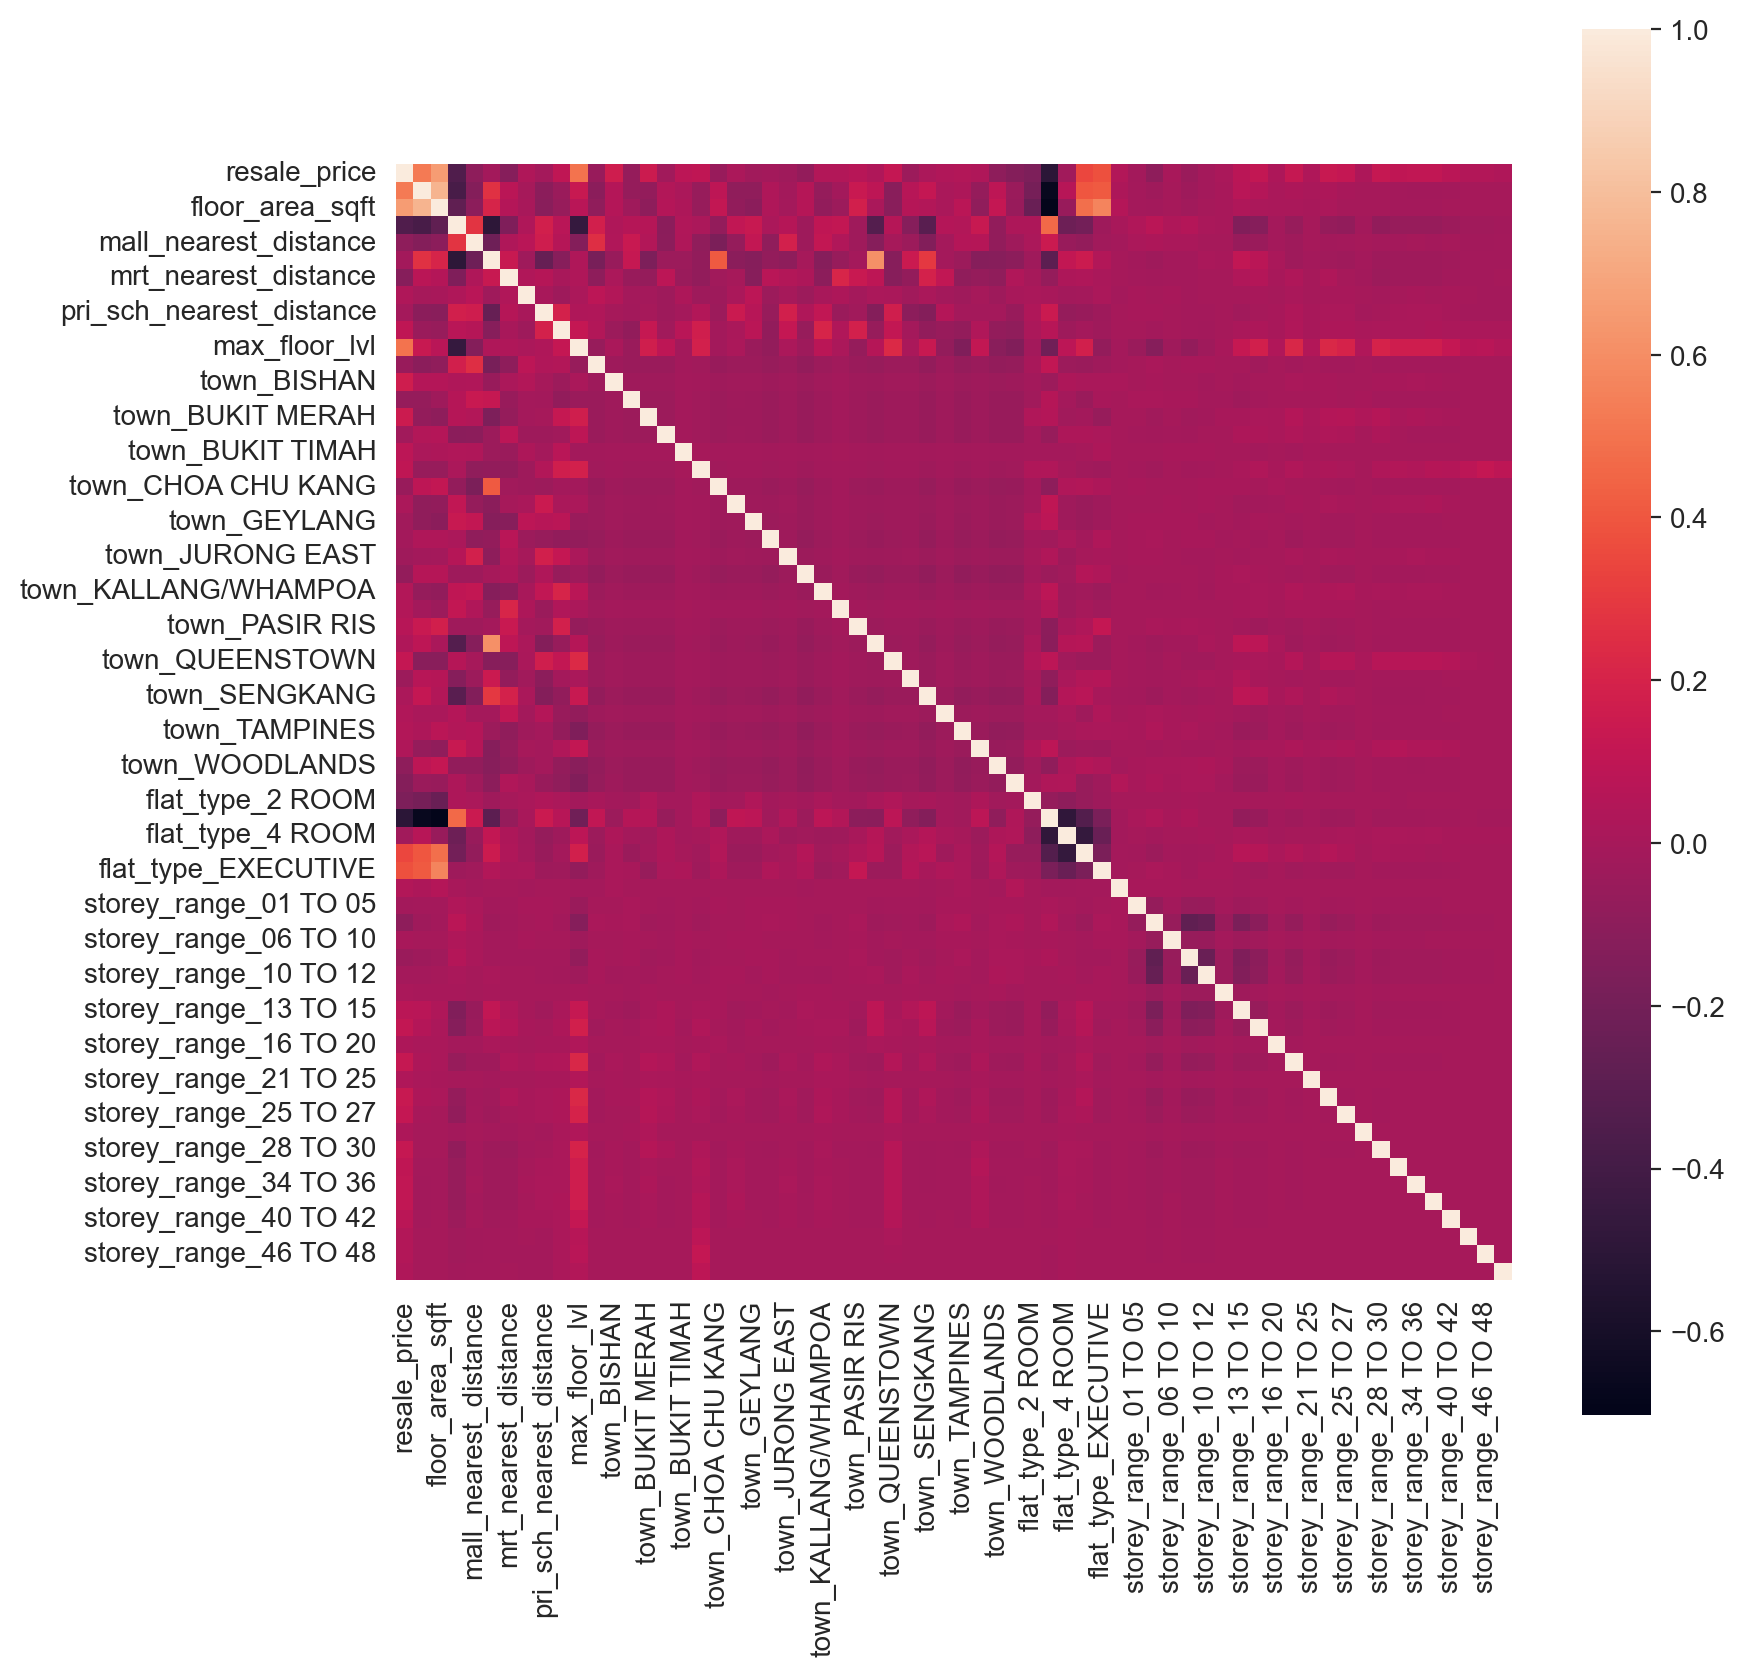

In [6]:
corr=hdb_merged_ohe_train.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(corr,vmax=1,square=True,)

<AxesSubplot: >

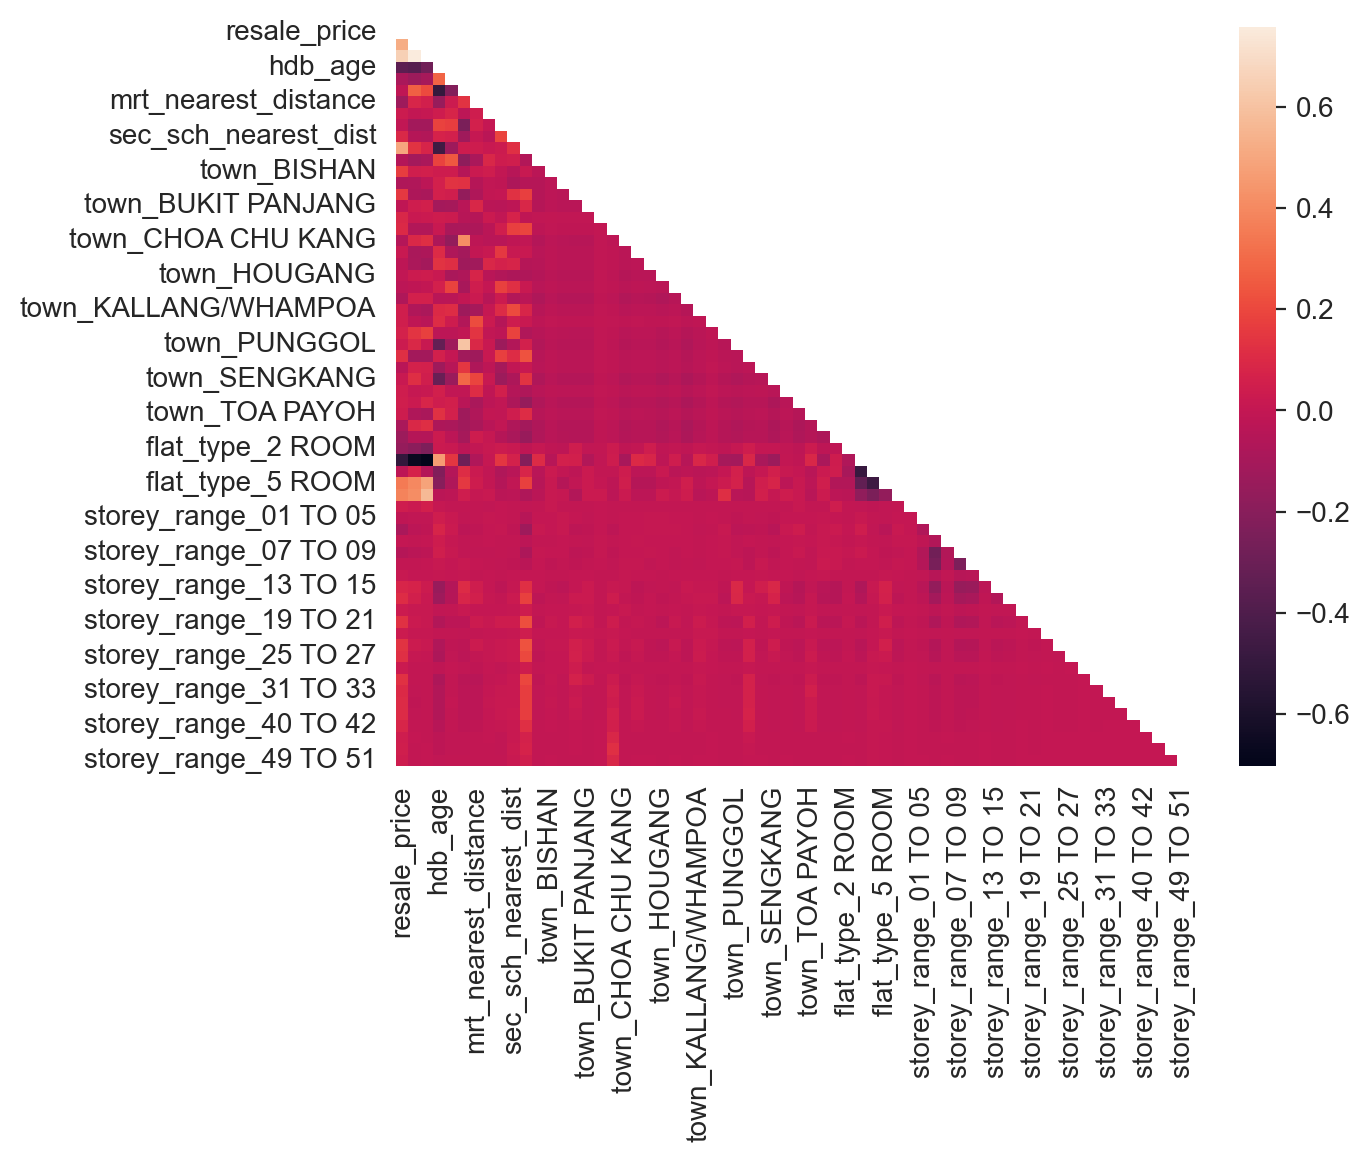

In [7]:
matrix = np.triu(hdb_merged_ohe_train.corr())
sns.heatmap(hdb_merged_ohe_train.corr(), mask = matrix)

## 1. Model the `high_corr_features` i.e. i)floor_area_sqft , ii) max_floor_lvl, iii) flat_type_EXECUTIVE, iv) flat_type_5 ROOM, v)flat_type_3 ROOM, vi)hdb_age with Linear Regression, RidgeCV, LassoCV and ElasticNet

In [8]:
high_corr_features = hdb_merged_ohe_train[['resale_price','floor_area_sqft','max_floor_lvl','flat_type_EXECUTIVE','flat_type_5 ROOM',
                                    'flat_type_3 ROOM','hdb_age']]

In [9]:
#checking the corr for set features 1
high_corr_features.corr()['resale_price'].sort_values().round(2)

flat_type_3 ROOM      -0.51
hdb_age               -0.35
flat_type_5 ROOM       0.35
flat_type_EXECUTIVE    0.38
max_floor_lvl          0.50
floor_area_sqft        0.65
resale_price           1.00
Name: resale_price, dtype: float64

<AxesSubplot: >

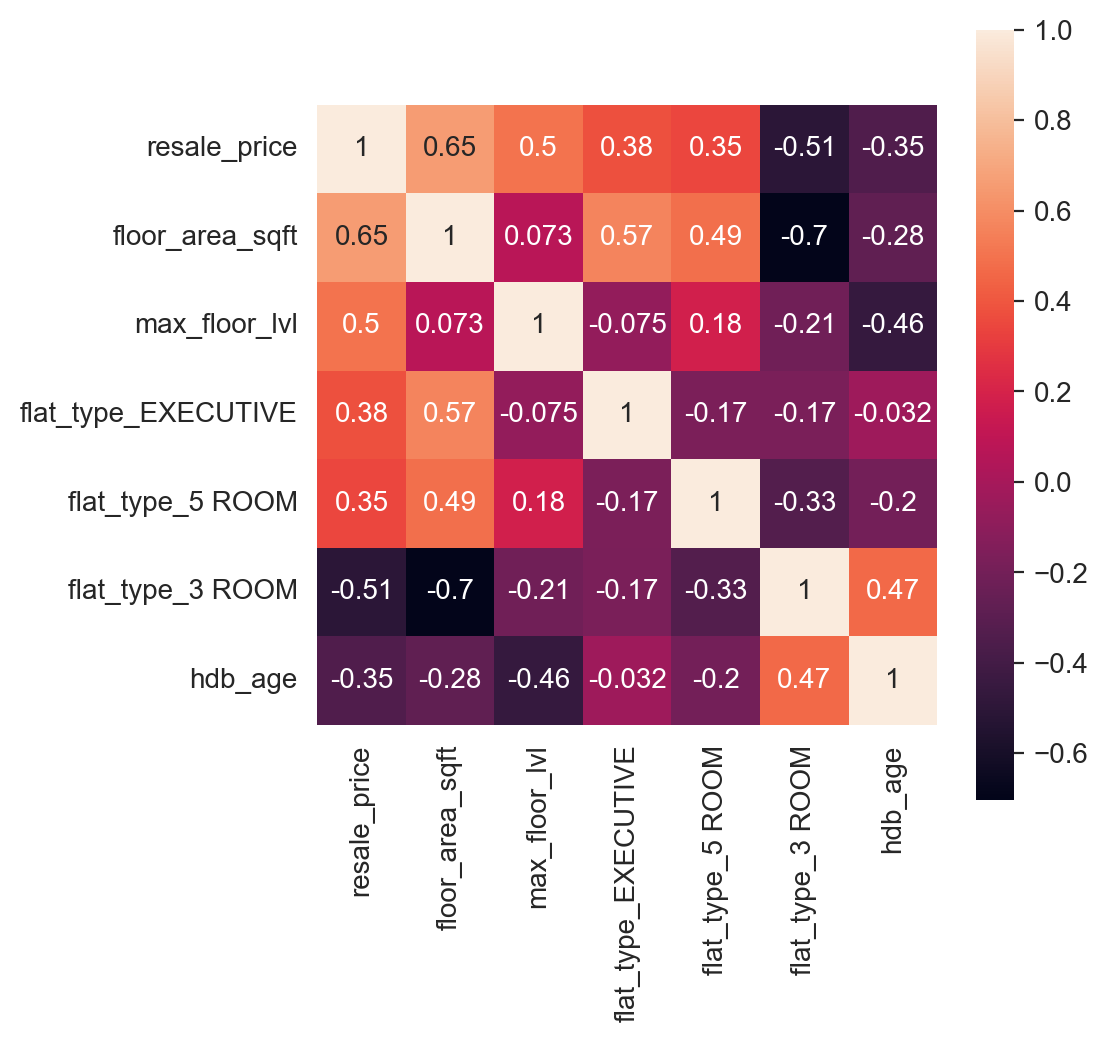

In [10]:
corr=high_corr_features.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr,square=True,annot=True)

<AxesSubplot: >

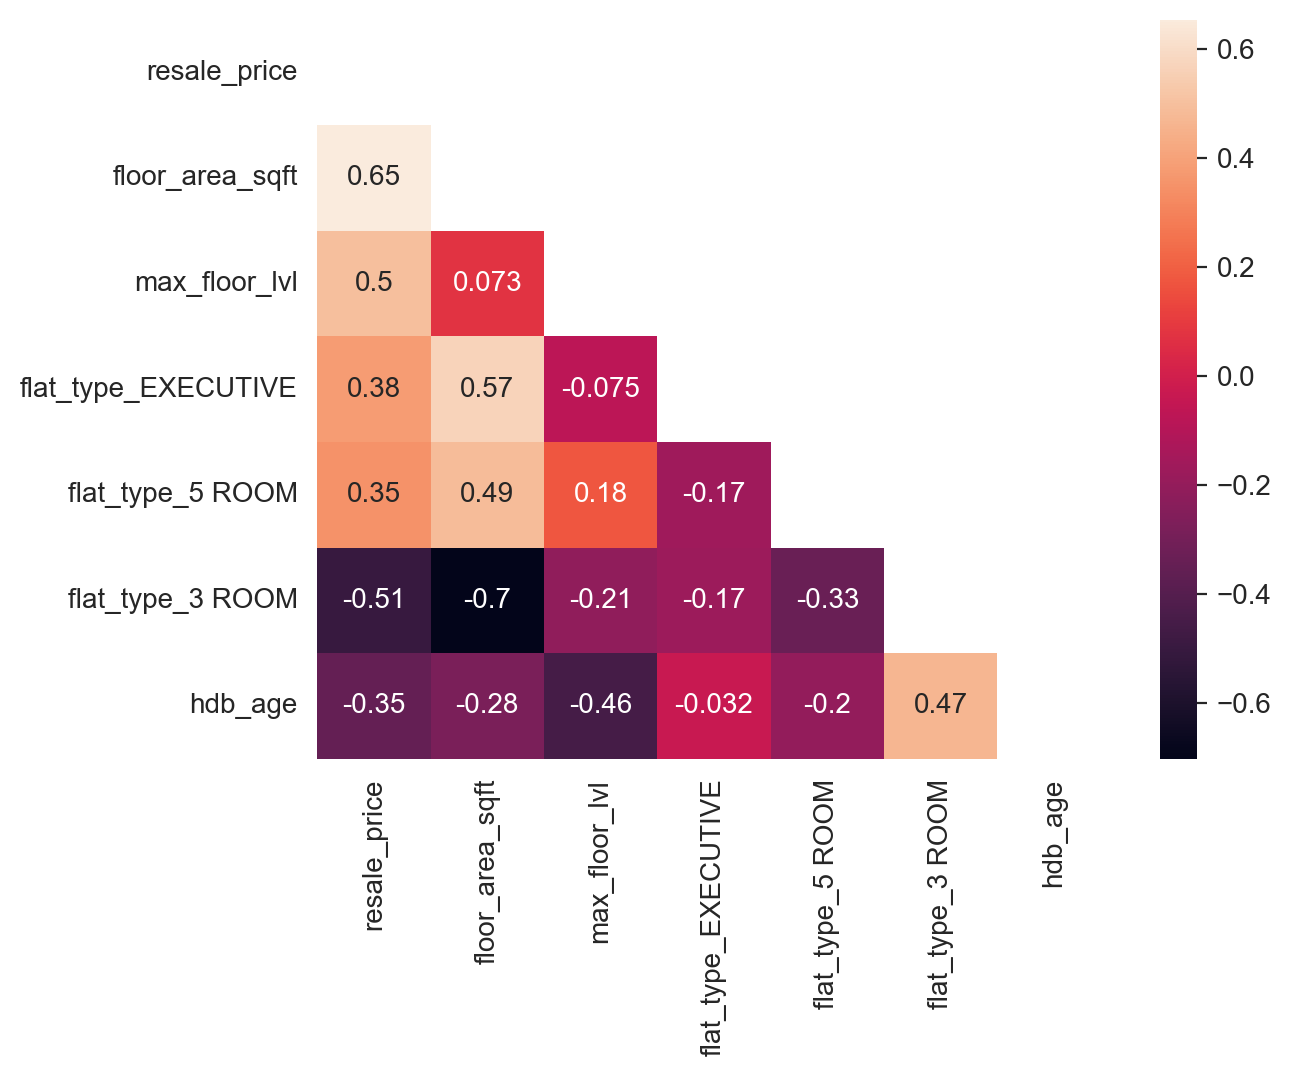

In [11]:
matrix = np.triu(corr)
sns.heatmap(corr, mask = matrix,annot=True)

<AxesSubplot: title={'center': 'Correlation of resale price against other features'}>

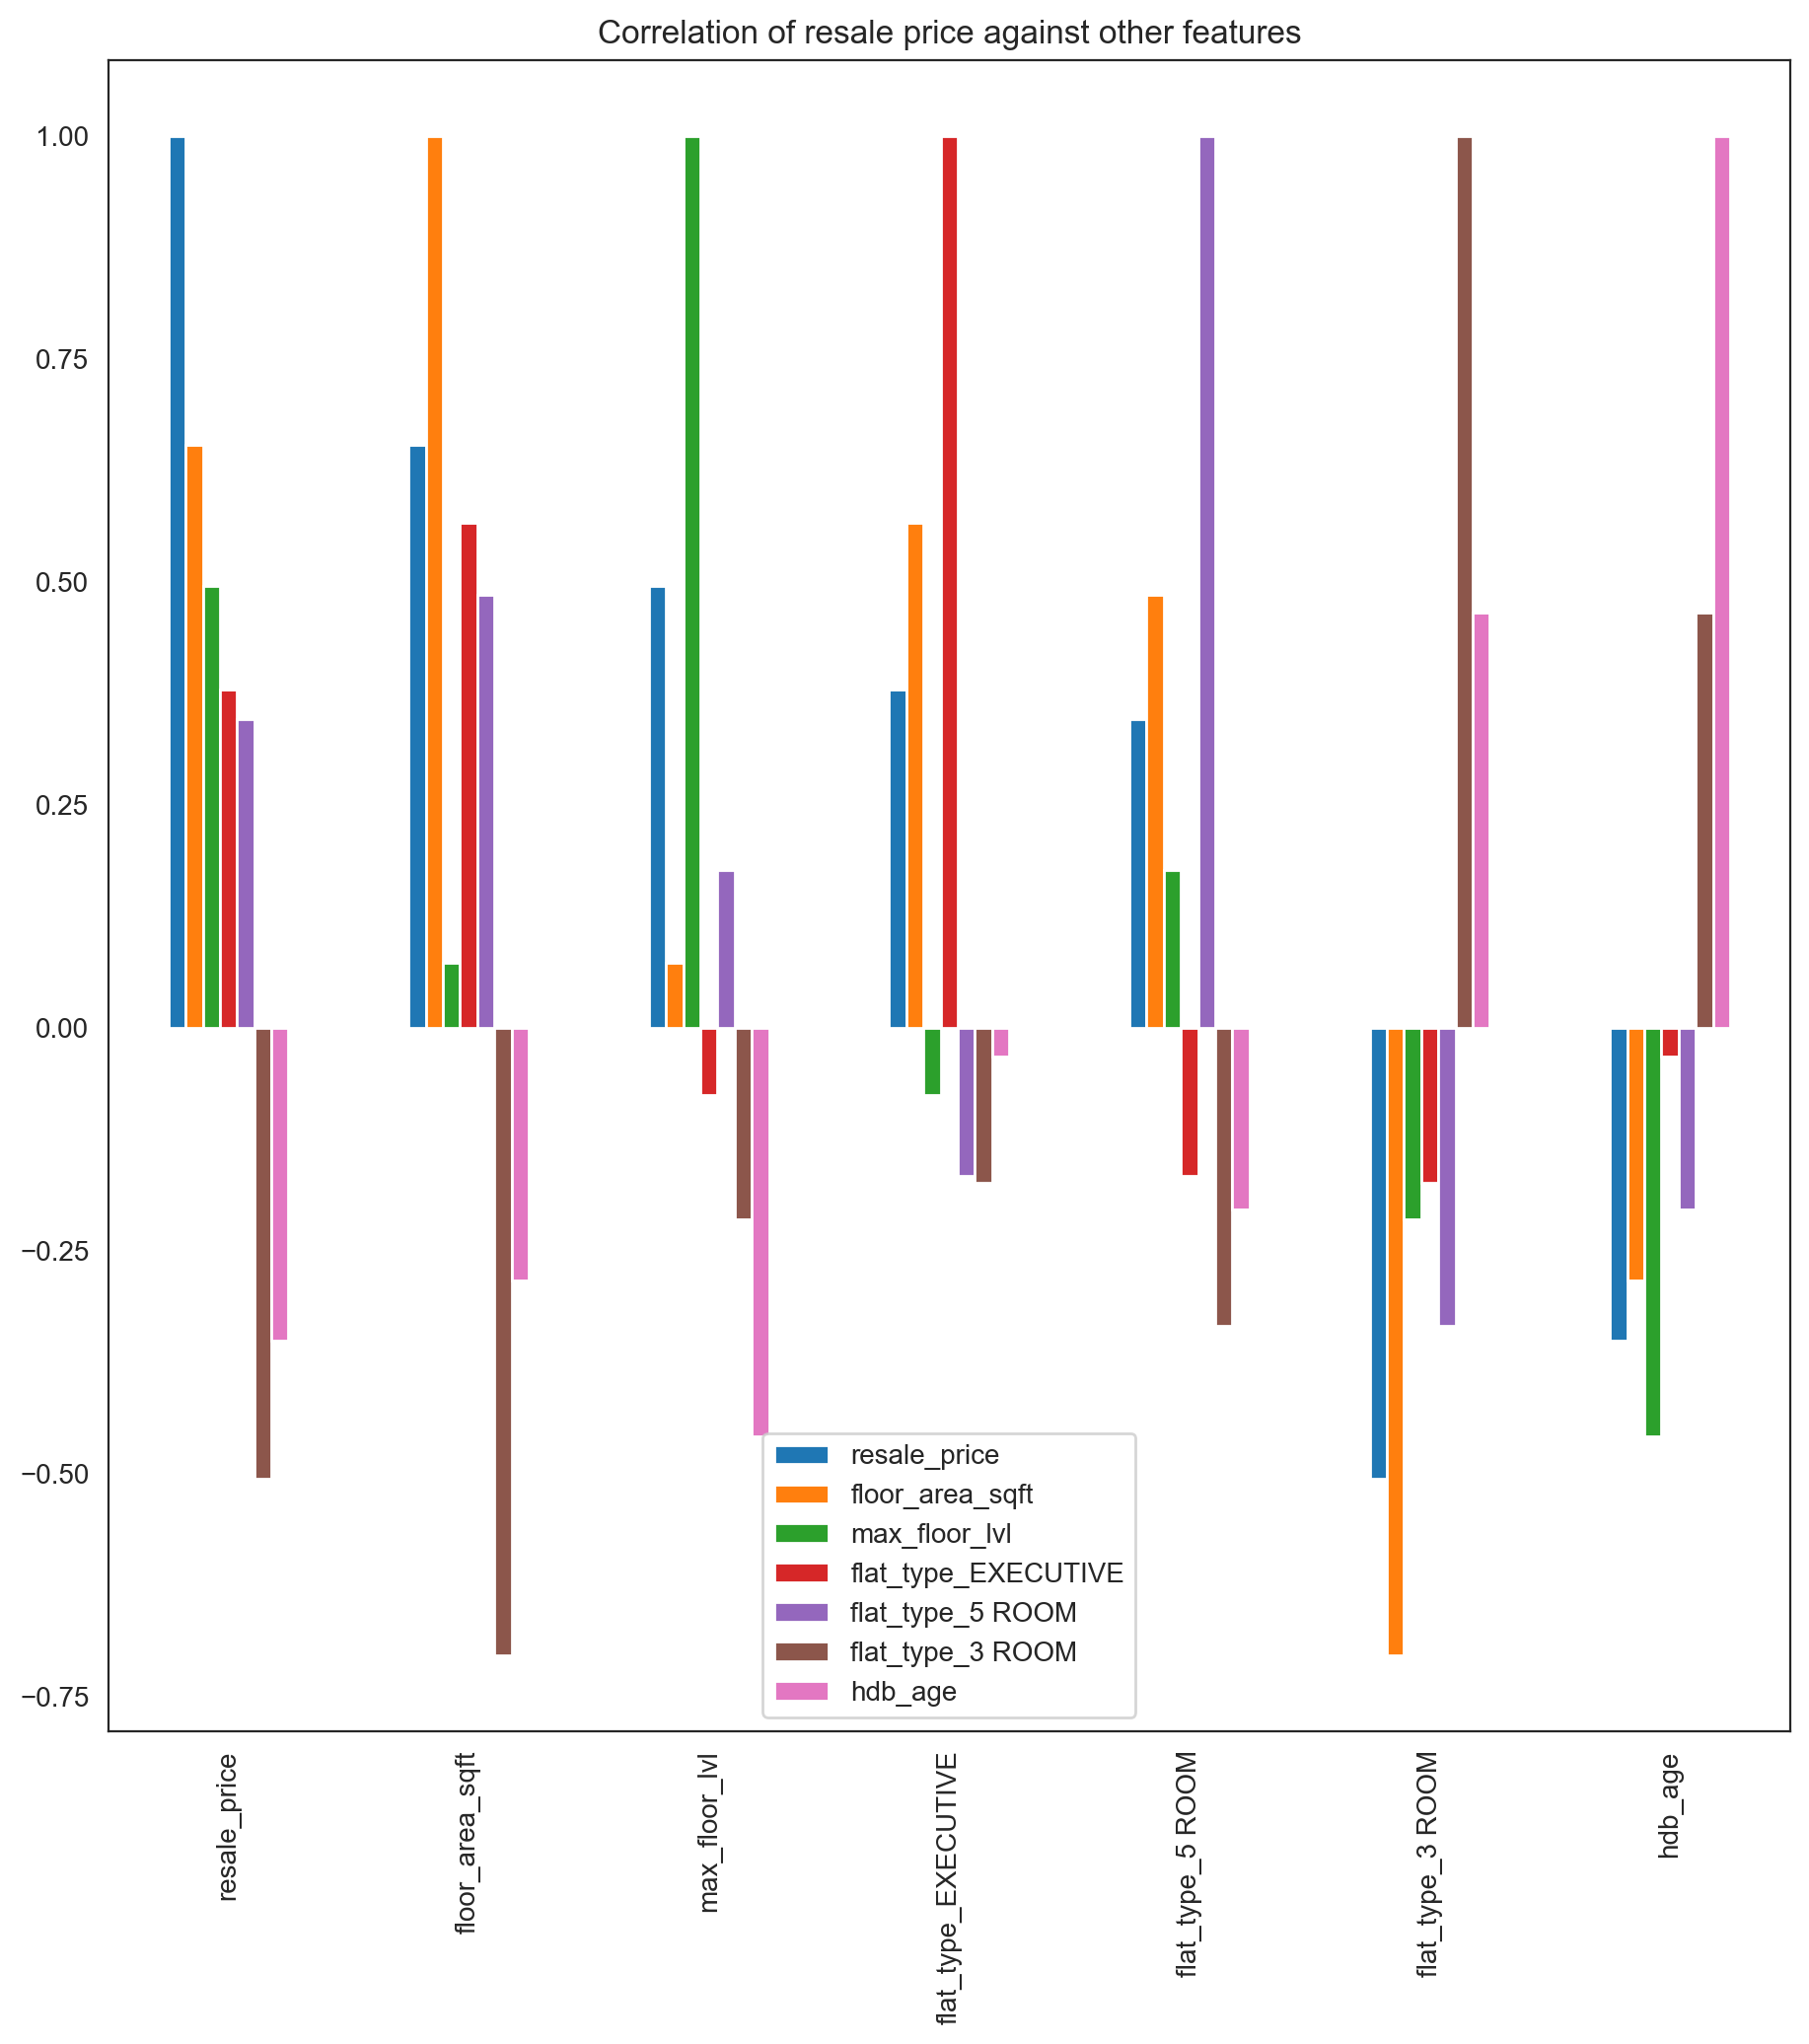

In [12]:
corr.plot(kind='bar',figsize=(11,11),title = 'Correlation of resale price against other features')

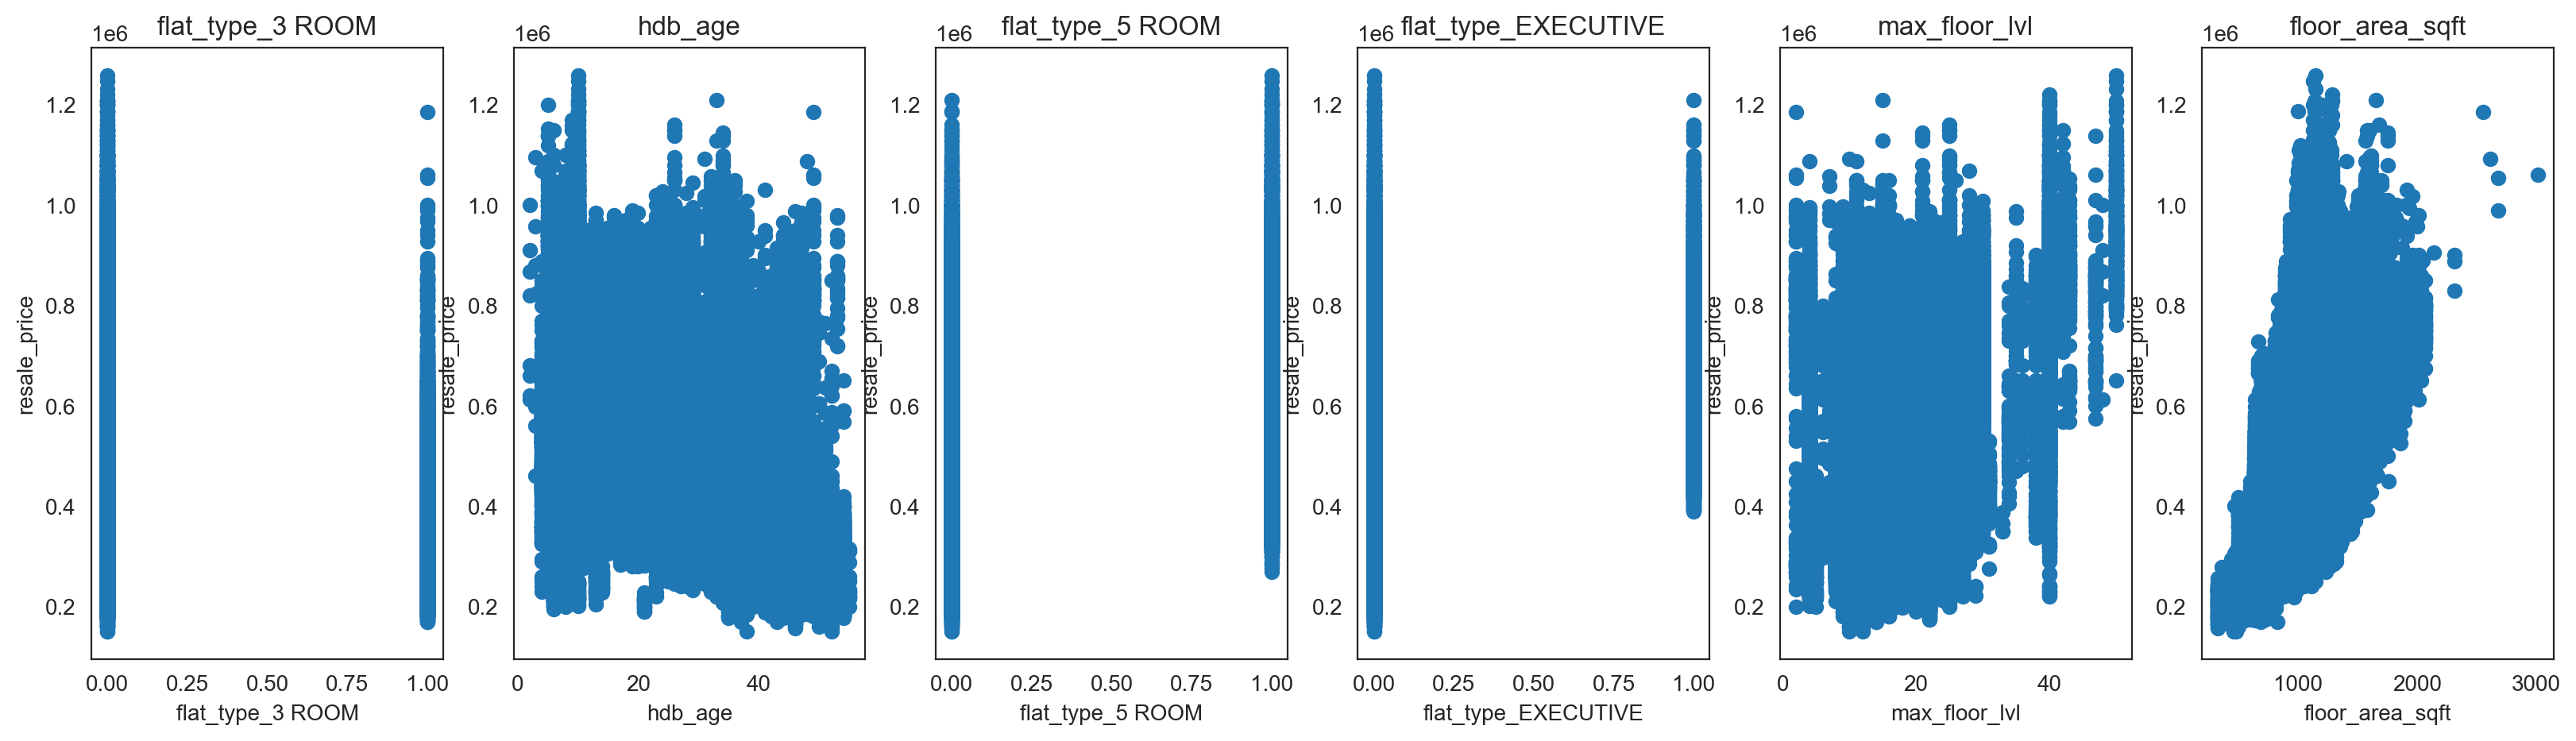

In [13]:
plt.figure(figsize=(20,5))

features = ['flat_type_3 ROOM','hdb_age','flat_type_5 ROOM','flat_type_EXECUTIVE','max_floor_lvl','floor_area_sqft']
target = high_corr_features['resale_price']

for i, col in enumerate(features):
    plt.subplot(1,len(features), i+1)
    x=high_corr_features[col]
    y=target
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('resale_price')

### Model Preparation: Standard Scaling and train_test_split

In [15]:
#perform modelling for high_corr_features
#set X and y variables for train_test_split
X = high_corr_features.drop(['resale_price'],axis='columns')
y=high_corr_features['resale_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

#apply standard scaler for high_corr_features 
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
print(f'high_corr_features Z_train shape is: {Z_train.shape}')
print(f'high_corr_features y_train shape is: {y_train.shape}')
print(f'high_corr_features Z_test shape is: {Z_test.shape}')
print(f'high_corr_features y_test shape is: {y_test.shape}')

high_corr_features Z_train shape is: (120507, 6)
high_corr_features y_train shape is: (120507,)
high_corr_features Z_test shape is: (30127, 6)
high_corr_features y_test shape is: (30127,)


### Linear Regression Modelling

In [16]:
# Instantiate the model & fit:
lr = LinearRegression()
lr.fit(Z_train,y_train)

# Evaluate model:
print(f'The lr R2 score for the train set is {lr.score(Z_train, y_train)}.')
print(f'The lr R2 score for the test set is {lr.score(Z_test, y_test)}.')
print(f'The lr CV score for the train set is {cross_val_score(lr, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred = lr.predict(Z_test)
y_pred_train = lr.predict(Z_train)

print(f'The lr prediction for the test set is {y_pred.mean()}.')
print(f'The lr prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
lr_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The lr RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The lr RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The lr R2 score for the train set is 0.6366142376172796.
The lr R2 score for the test set is 0.6337252603091481.
The lr CV score for the train set is 0.6364773065467315.
The lr prediction for the test set is 448336.719849039.
The lr prediction for the train set is 449417.361259844.
The lr RMSE for the test set is 86420.79992580904.
The lr RMSE for the train set is 86463.87567798971.


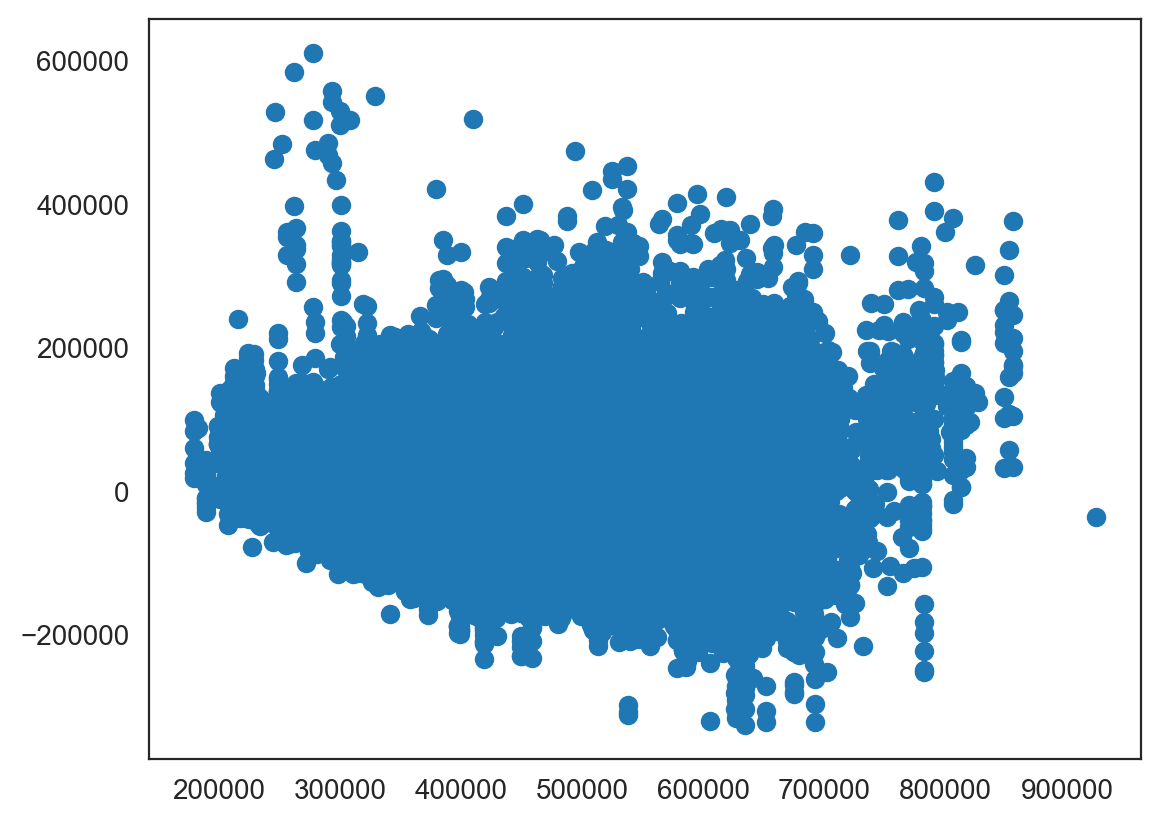

In [17]:
plt.scatter(y_pred, lr_residuals)

### Ridge CV Modelling

In [18]:
# Set up a list of ridge alphas to check:
r_alphas = np.logspace(0, 5, 100)

# Instantiate the model & fit:
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=10)
ridge_cv = ridge_cv.fit(Z_train, y_train)

# Evaluate model:
print(f'The ridge_cv R2 score for the train set is {ridge_cv.score(Z_train, y_train)}.')
print(f'The ridge_cv R2 score for the test set is {ridge_cv.score(Z_test, y_test)}.')
print(f'The ridge_cv CV score for the train set is {cross_val_score(ridge_cv, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred=ridge_cv.predict(Z_test)
y_pred_train=ridge_cv.predict(Z_train)

print(f'The ridge_cv prediction for the test set is {y_pred.mean()}.')
print(f'The ridge_cv prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
ridgecv_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The ridge_cv RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The ridge_cv RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The ridge_cv R2 score for the train set is 0.6366142287797893.
The ridge_cv R2 score for the test set is 0.6337262063329219.
The ridge_cv CV score for the train set is 0.6364773242544082.
The ridge_cv prediction for the test set is 448336.8637985448.
The ridge_cv prediction for the train set is 449417.3612598439.
The ridge_cv RMSE for the test set is 86420.68832080983.
The ridge_cv RMSE for the train set is 86463.8767293843.


In [19]:
ridge_cv.coef_

array([83637.64998261, 68567.1729018 , 12465.62396559,   509.23193424,
        1407.41451434,  4690.69453965])

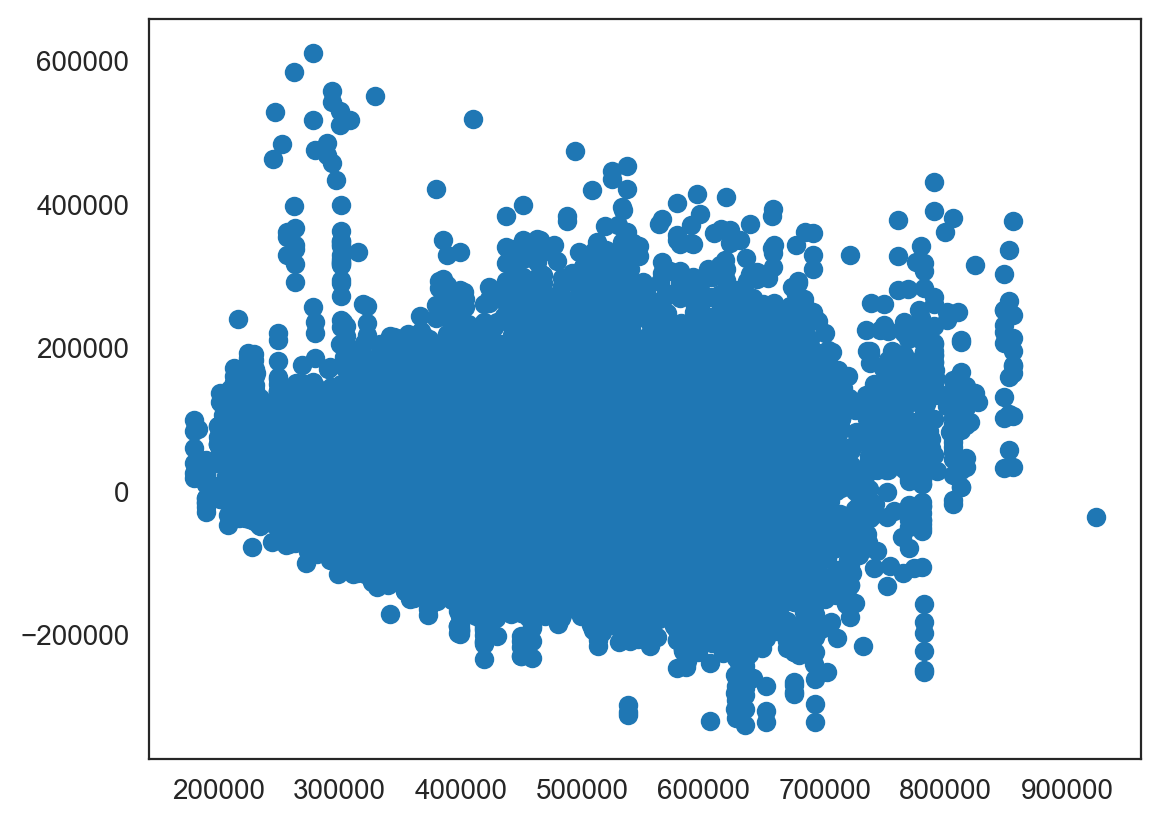

In [20]:
plt.scatter(y_pred, ridgecv_residuals)

### Lasso CV Modelling

In [21]:
# Set up a list of Lasso alphas to check:
l_alphas = np.logspace(-3, 0, 100)

# Instantiate the model & fit:
lasso_cv = LassoCV(alphas=l_alphas, cv=10, max_iter=50000)
lasso_cv.fit(Z_train, y_train);

# Evaluate model:
print(f'The lasso_cv R2 score for the train set is {lasso_cv.score(Z_train, y_train)}.')
print(f'The lasso_cv R2 score for the test set is {lasso_cv.score(Z_test, y_test)}.')
print(f'The lasso_cv CV score for the train set is {cross_val_score(lasso_cv, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred=lasso_cv.predict(Z_test)
y_pred_train=lasso_cv.predict(Z_train)

print(f'The lasso_cv prediction for the test set is {y_pred.mean()}.')
print(f'The lasso_cv prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
lasso_cv_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The lasso_cv RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The lasso_cv RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The lasso_cv R2 score for the train set is 0.6366142369407407.
The lasso_cv R2 score for the test set is 0.6337253800657905.
The lasso_cv CV score for the train set is 0.6364773328383958.
The lasso_cv prediction for the test set is 448336.7056402279.
The lasso_cv prediction for the train set is 449417.3612598439.
The lasso_cv RMSE for the test set is 86420.7857978.
The lasso_cv RMSE for the train set is 86463.87575847741.


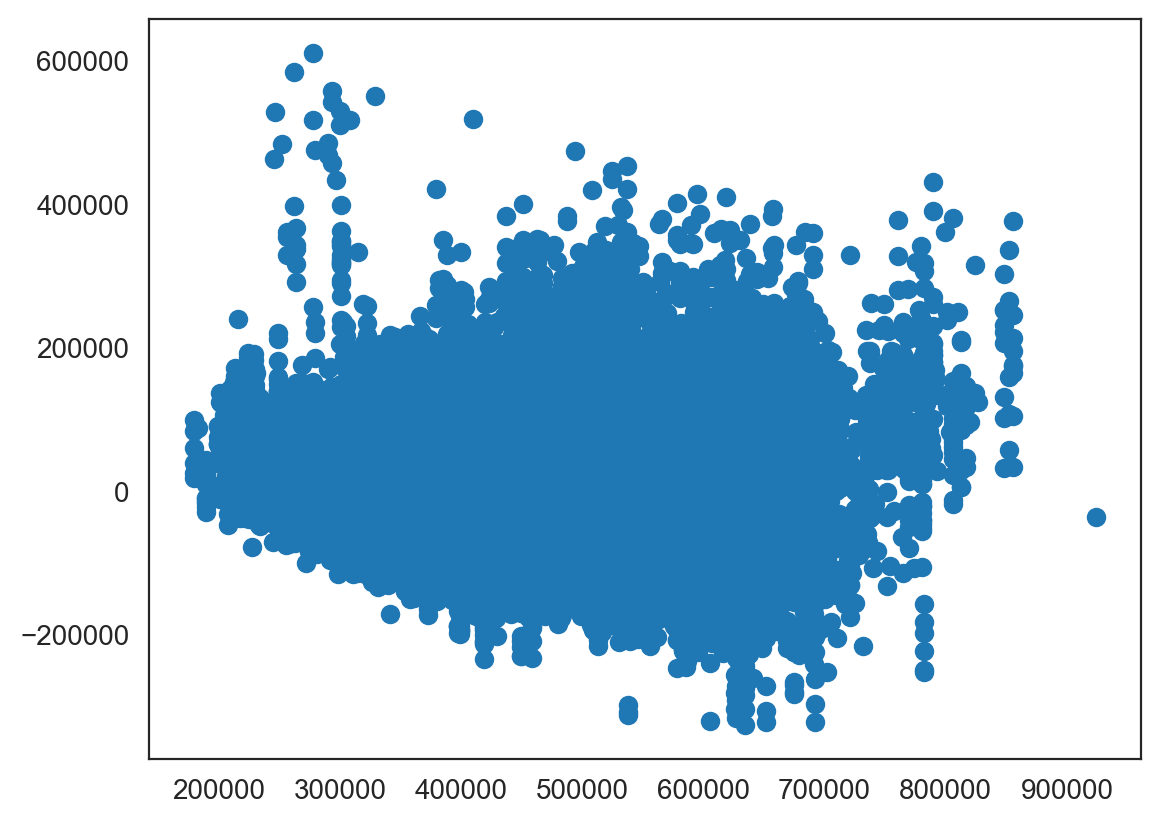

In [22]:
plt.scatter(y_pred, lasso_cv_residuals)

### ElasticNet Modelling

In [23]:
# Set up a list of alphas to check:
enet_alphas = np.linspace(0.5, 1.0, 100)
enet_ratio = 0.5

# Instantiate the model & fit:
enet = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet = enet.fit(Z_train, y_train)

# Evaluate model:
print(f'The enet R2 score for the train set is {enet.score(Z_train, y_train)}.')
print(f'The enet R2 score for the test set is {enet.score(Z_test, y_test)}.')
print(f'The enet CV score for the train set is {cross_val_score(enet, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred=enet.predict(Z_test)
y_pred_train=enet.predict(Z_train)

print(f'The enet prediction for the test set is {y_pred.mean()}.')
print(f'The enet prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
enet_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The enet RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The enet RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The enet R2 score for the train set is 0.6136759018160945.
The enet R2 score for the test set is 0.6127203110969364.
The enet CV score for the train set is 0.6135806029106449.
The enet prediction for the test set is 448562.29364751704.
The enet prediction for the train set is 449417.3612598439.
The enet RMSE for the test set is 88864.26600764049.
The enet RMSE for the train set is 89151.08736256376.


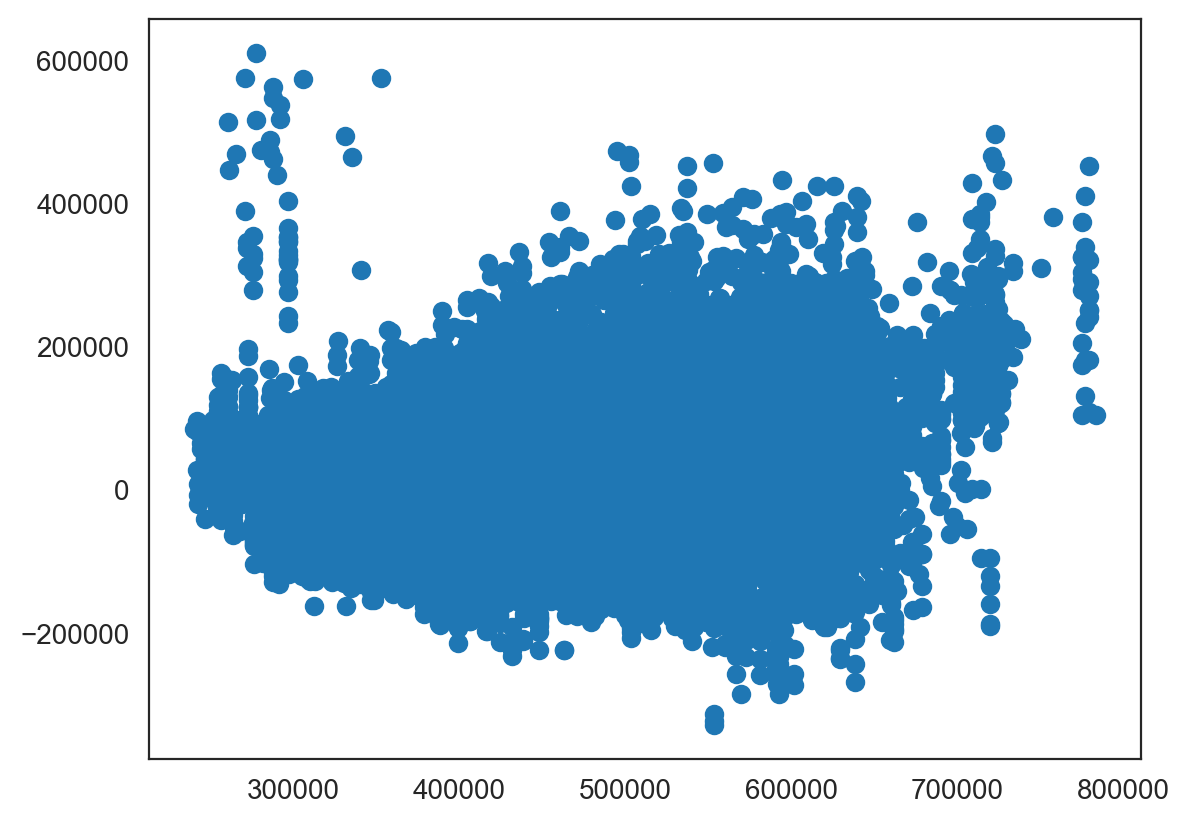

In [25]:
plt.scatter(y_pred, enet_residuals)

### Summmary of scores for the high correlated features i.e. i)floor_area_sqft , ii) max_floor_lvl, iii) flat_type_EXECUTIVE, iv) flat_type_5 ROOM, v)flat_type_3 ROOM, vi)hdb_age:
Linear Regression
- The lr R2 score for the train set is 0.6366142376172796.
- The lr R2 score for the test set is 0.6337252603091481.
- The lr CV score for the train set is 0.6364773065467315.
- The lr prediction for the test set is 448336.719849039.
- The lr prediction for the train set is 449417.361259844.
- The lr RMSE for the test set is 86420.79992580904.
- The lr RMSE for the train set is 86463.87567798971.

RidgeCV
- The ridge_cv R2 score for the train set is 0.6366142287797893.
- The ridge_cv R2 score for the test set is 0.6337262063329219.
- The ridge_cv CV score for the train set is 0.6364773242544082.
- The ridge_cv prediction for the test set is 448336.8637985448.
- The ridge_cv prediction for the train set is 449417.3612598439.
- The ridge_cv RMSE for the test set is 86420.68832080983.
- The ridge_cv RMSE for the train set is 86463.8767293843.

LassoCV
- The lasso_cv R2 score for the train set is 0.6366142369407407.
- The lasso_cv R2 score for the test set is 0.6337253800657905.
- The lasso_cv CV score for the train set is 0.6364773328383958.
- The lasso_cv prediction for the test set is 448336.7056402279.
- The lasso_cv prediction for the train set is 449417.3612598439.
- The lasso_cv RMSE for the test set is 86420.7857978.
- The lasso_cv RMSE for the train set is 86463.87575847741.

Elastic Net
- The enet R2 score for the train set is 0.6136759018160945.
- The enet R2 score for the test set is 0.6127203110969364.
- The enet CV score for the train set is 0.6135806029106449.
- The enet prediction for the test set is 448562.29364751704.
- The enet prediction for the train set is 449417.3612598439.
- The enet RMSE for the test set is 88864.26600764049.
- The enet RMSE for the train set is 89151.08736256376.

### In conclusion, the best model for high_corr_features is RidgeCV for an r2 score of 0.6337262063329219.

## 2. Model Set Features 1 (sf1) based on the assumption that families with young childeren will consider the following factors: `floor_area_sqft`,`pri_sch_nearest_distance`,`bus_stop_nearest_distance`,`mrt_nearest_distance`

In [26]:
sf1 = hdb_merged_ohe_train[['resale_price','floor_area_sqft','pri_sch_nearest_distance','bus_stop_nearest_distance','mrt_nearest_distance']]

In [27]:
#checking the corr for set features 1
sf1.corr()['resale_price'].sort_values().round(2)

mrt_nearest_distance        -0.13
pri_sch_nearest_distance    -0.01
bus_stop_nearest_distance    0.03
floor_area_sqft              0.65
resale_price                 1.00
Name: resale_price, dtype: float64

<AxesSubplot: >

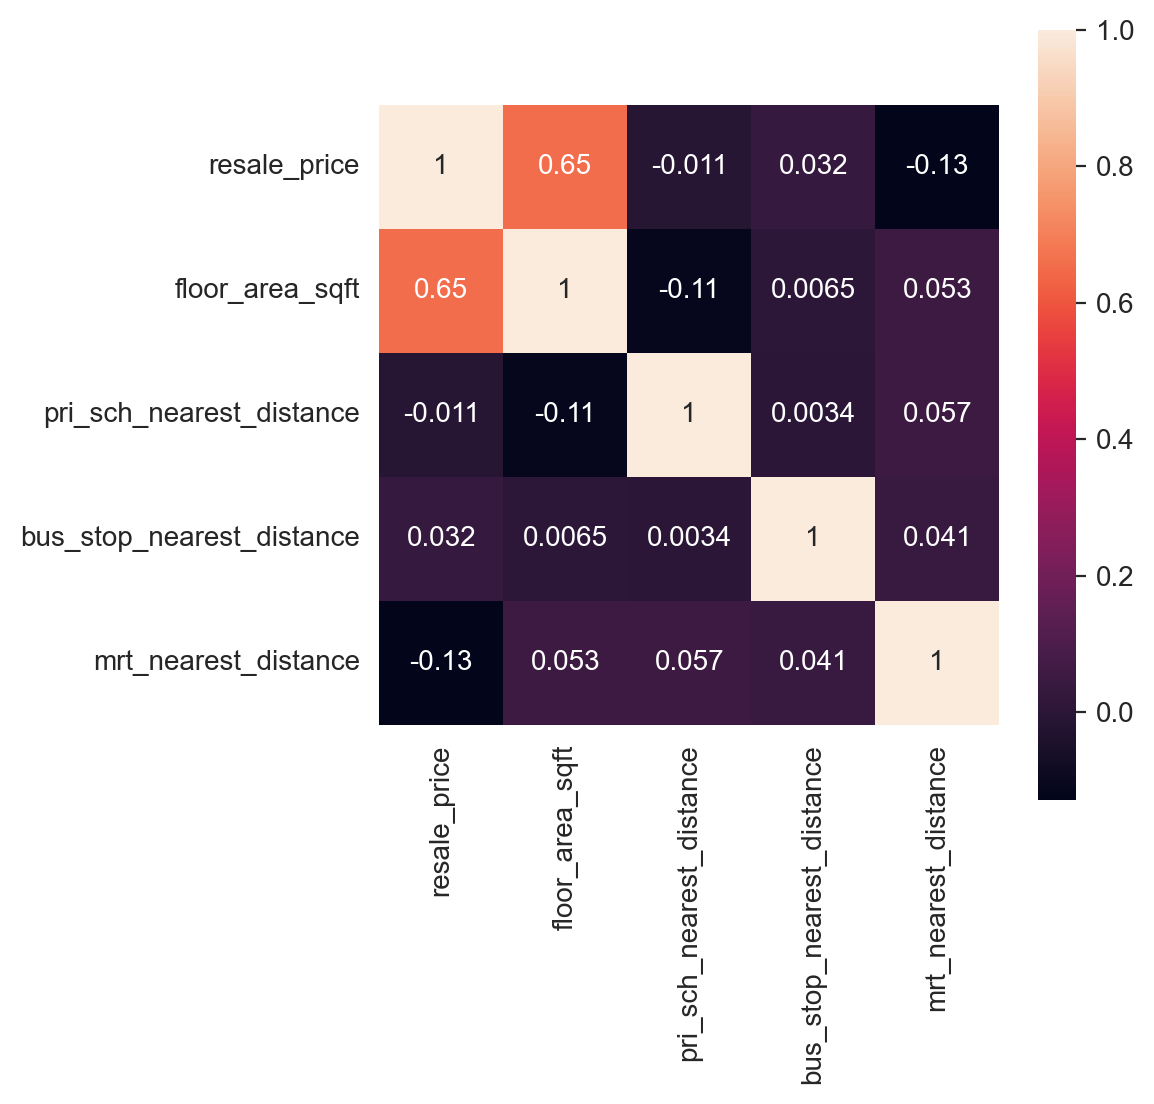

In [28]:
corr=sf1.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr,square=True,annot=True)

<AxesSubplot: >

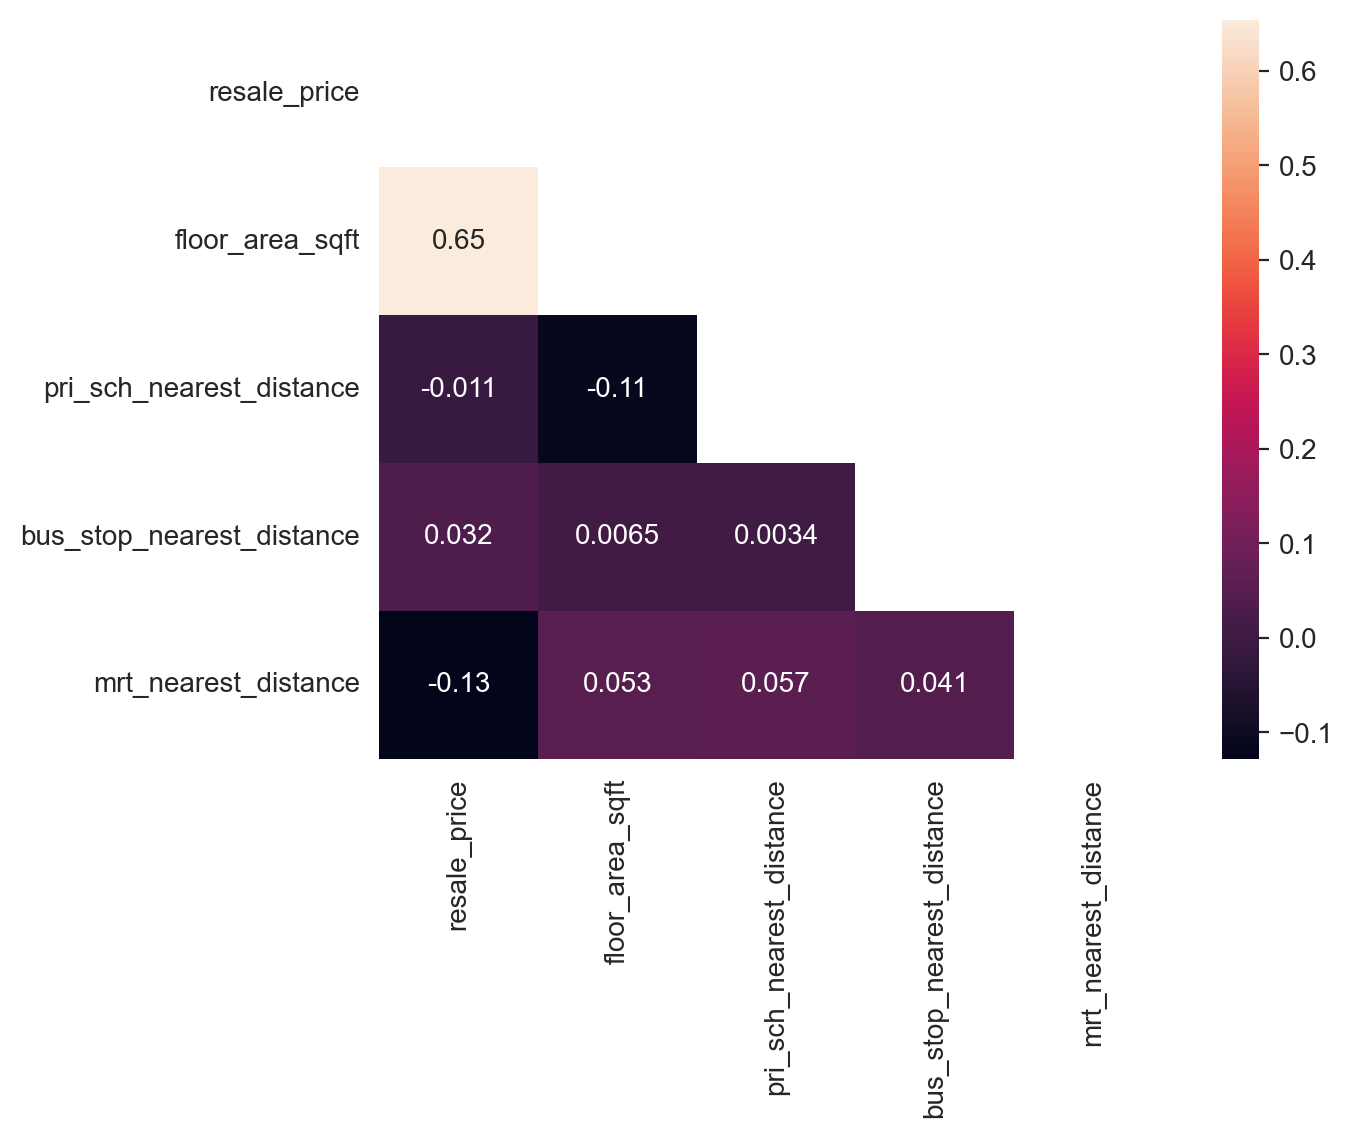

In [29]:
matrix = np.triu(corr)
sns.heatmap(corr, mask = matrix,annot=True)

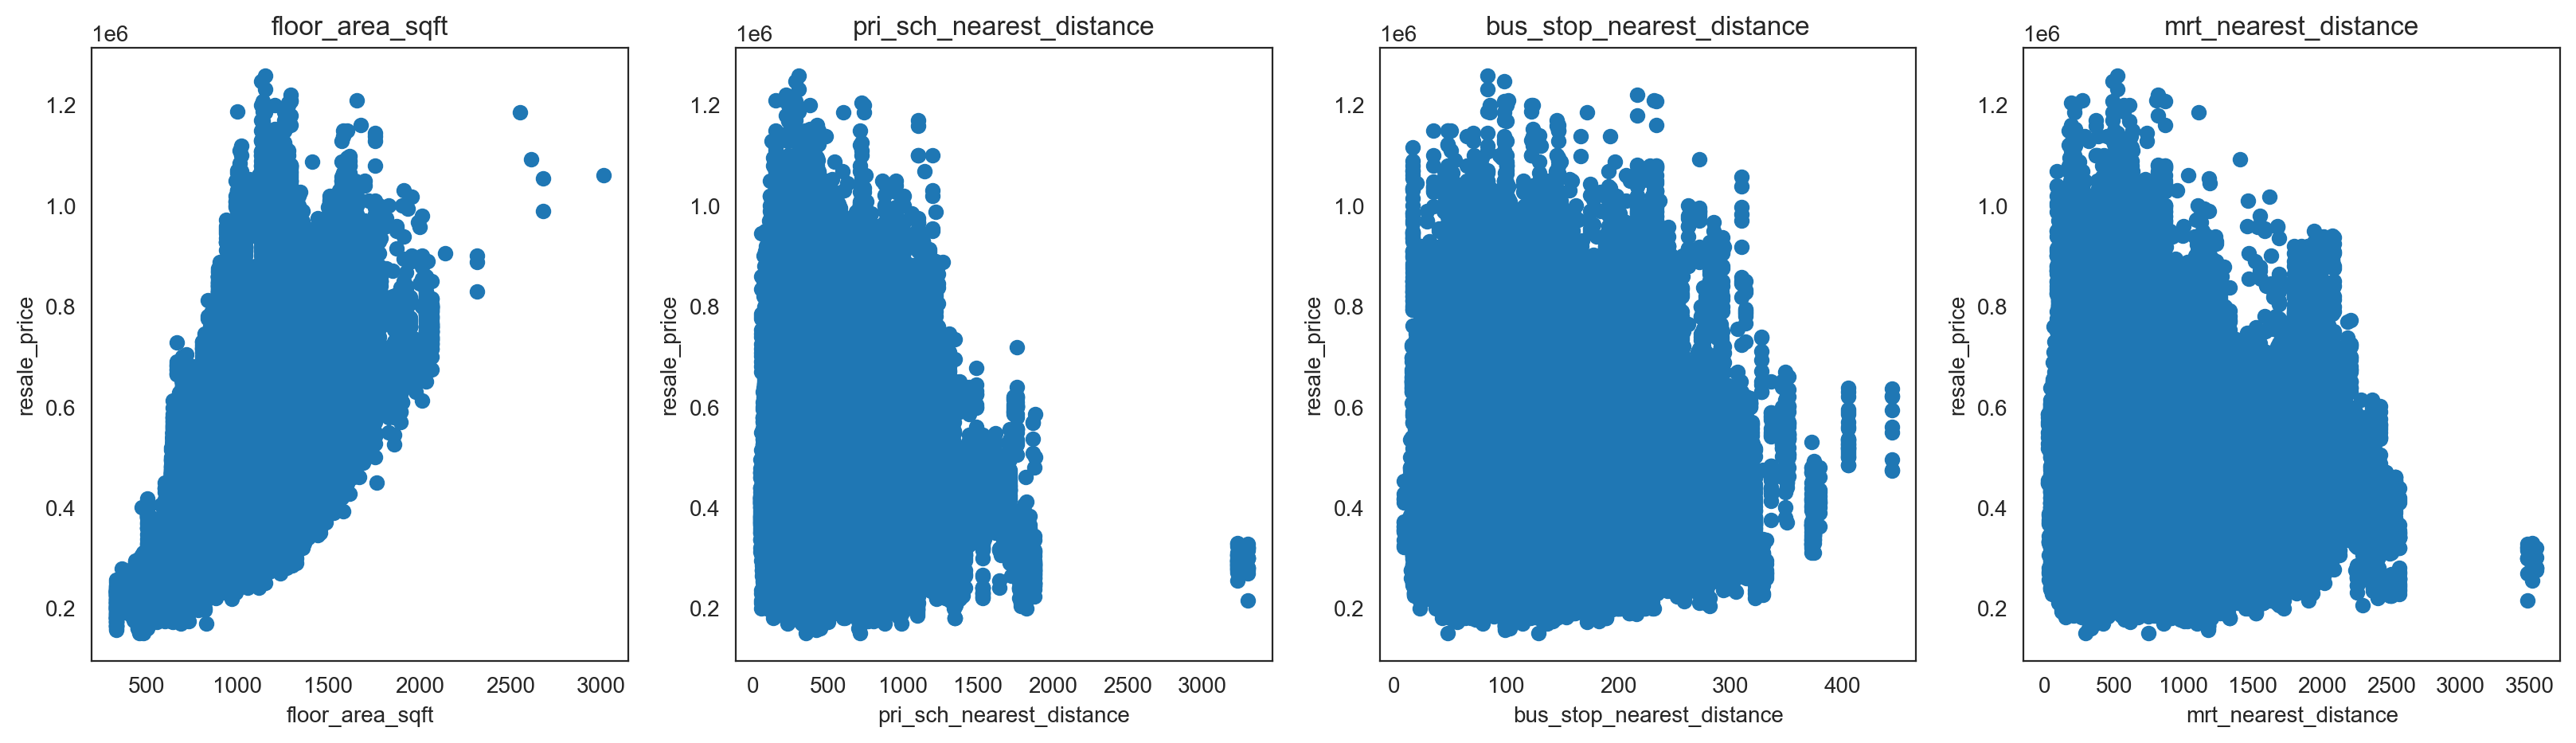

In [30]:
plt.figure(figsize=(20,5))

features = ['floor_area_sqft','pri_sch_nearest_distance','bus_stop_nearest_distance','mrt_nearest_distance']
target = sf1['resale_price']

for i, col in enumerate(features):
    plt.subplot(1,len(features), i+1)
    x=sf1[col]
    y=target
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('resale_price')

### Model Preparation: Standard Scaling and train_test_split

In [31]:
#perform modelling for sf1
#set X and y variables for train_test_split
X= sf1.drop(['resale_price'],axis='columns')
y=sf1['resale_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

#apply standard scaler for sf2 
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
print(f'sf1 Z_train shape is: {Z_train.shape}')
print(f'sf1 y_train shape is: {y_train.shape}')
print(f'sf1 Z_test shape is: {Z_test.shape}')
print(f'sf1 y_test shape is: {y_test.shape}')

sf1 Z_train shape is: (120507, 4)
sf1 y_train shape is: (120507,)
sf1 Z_test shape is: (30127, 4)
sf1 y_test shape is: (30127,)


### Linear Regression Modelling

In [32]:
# Instantiate the model & fit:
lr = LinearRegression()
lr.fit(Z_train,y_train)

# Evaluate model:
print(f'The lr R2 score for the train set is {lr.score(Z_train, y_train)}.')
print(f'The lr R2 score for the test set is {lr.score(Z_test, y_test)}.')
print(f'The lr CV score for the train set is {cross_val_score(lr, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred = lr.predict(Z_test)
y_pred_train = lr.predict(Z_train)

print(f'The lr prediction for the test set is {y_pred.mean()}.')
print(f'The lr prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
lr_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The lr RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The lr RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The lr R2 score for the train set is 0.46041547361915147.
The lr R2 score for the test set is 0.4643188187125361.
The lr CV score for the train set is 0.4603499656519089.
The lr prediction for the test set is 448167.2772353671.
The lr prediction for the train set is 449417.36125984386.
The lr RMSE for the test set is 104512.44130899094.
The lr RMSE for the train set is 105361.14662115743.


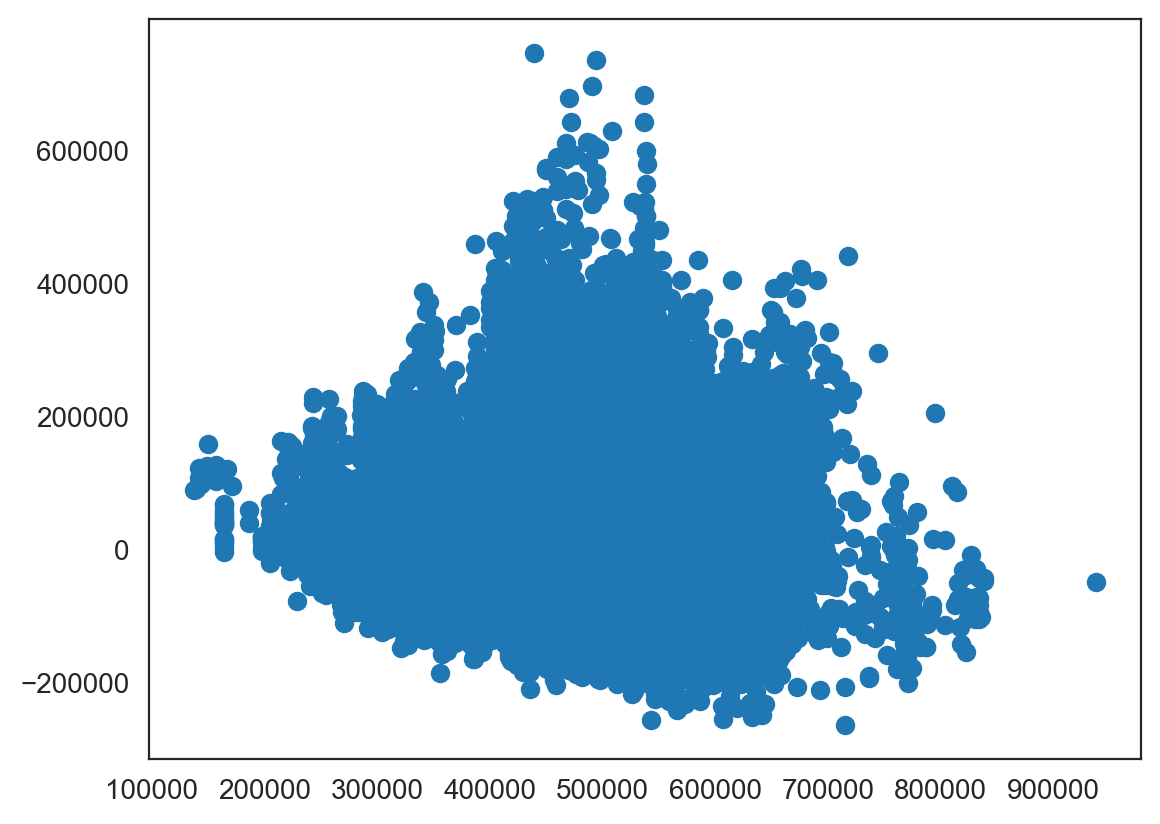

In [33]:
plt.scatter(y_pred, lr_residuals)

### Ridge CV Modelling

In [34]:
# Set up a list of ridge alphas to check:
r_alphas = np.logspace(0, 5, 100)

# Instantiate the model & fit:
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=10)
ridge_cv = ridge_cv.fit(Z_train, y_train)

# Evaluate model:
print(f'The ridge_cv R2 score for the train set is {ridge_cv.score(Z_train, y_train)}.')
print(f'The ridge_cv R2 score for the test set is {ridge_cv.score(Z_test, y_test)}.')
print(f'The ridge_cv CV score for the train set is {cross_val_score(ridge_cv, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred=ridge_cv.predict(Z_test)
y_pred_train=ridge_cv.predict(Z_train)

print(f'The ridge_cv prediction for the test set is {y_pred.mean()}.')
print(f'The ridge_cv prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
ridgecv_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The ridge_cv RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The ridge_cv RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The ridge_cv R2 score for the train set is 0.4604154544552418.
The ridge_cv R2 score for the test set is 0.46431941580999514.
The ridge_cv CV score for the train set is 0.4603500448716746.
The ridge_cv prediction for the test set is 448167.54248045315.
The ridge_cv prediction for the train set is 449417.3612598439.
The ridge_cv RMSE for the test set is 104512.38306153638.
The ridge_cv RMSE for the train set is 105361.14849216316.


In [35]:
ridge_cv.coef_

array([ 96190.29250028,  10968.06949719,   4691.6777625 , -24458.14569103])

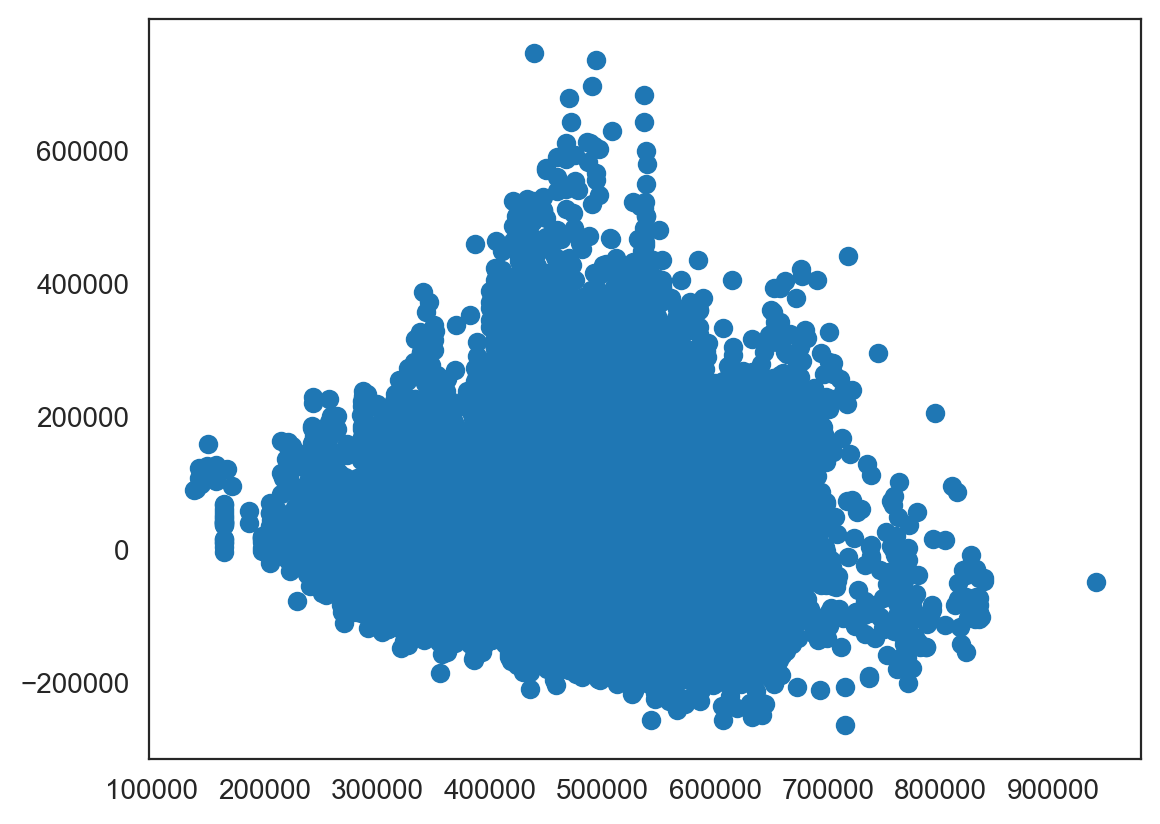

In [36]:
plt.scatter(y_pred, ridgecv_residuals)

### Lasso CV Modelling

In [37]:
# Set up a list of Lasso alphas to check:
l_alphas = np.logspace(-3, 0, 100)

# Instantiate the model & fit:
lasso_cv = LassoCV(alphas=l_alphas, cv=10, max_iter=50000)
lasso_cv.fit(Z_train, y_train);

# Evaluate model:
print(f'The lasso_cv R2 score for the train set is {lasso_cv.score(Z_train, y_train)}.')
print(f'The lasso_cv R2 score for the test set is {lasso_cv.score(Z_test, y_test)}.')
print(f'The lasso_cv CV score for the train set is {cross_val_score(lasso_cv, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred=lasso_cv.predict(Z_test)
y_pred_train=lasso_cv.predict(Z_train)

print(f'The lasso_cv prediction for the test set is {y_pred.mean()}.')
print(f'The lasso_cv prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
lasso_cv_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The lasso_cv RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The lasso_cv RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The lasso_cv R2 score for the train set is 0.46041547339488254.
The lasso_cv R2 score for the test set is 0.4643189092102431.
The lasso_cv CV score for the train set is 0.46034996977977993.
The lasso_cv prediction for the test set is 448167.3069765572.
The lasso_cv prediction for the train set is 449417.3612598439.
The lasso_cv RMSE for the test set is 104512.43248085116.
The lasso_cv RMSE for the train set is 105361.14664305322.


In [38]:
lasso_cv.coef_

array([ 96208.37176259,  10971.46514635,   4691.66447059, -24462.99858582])

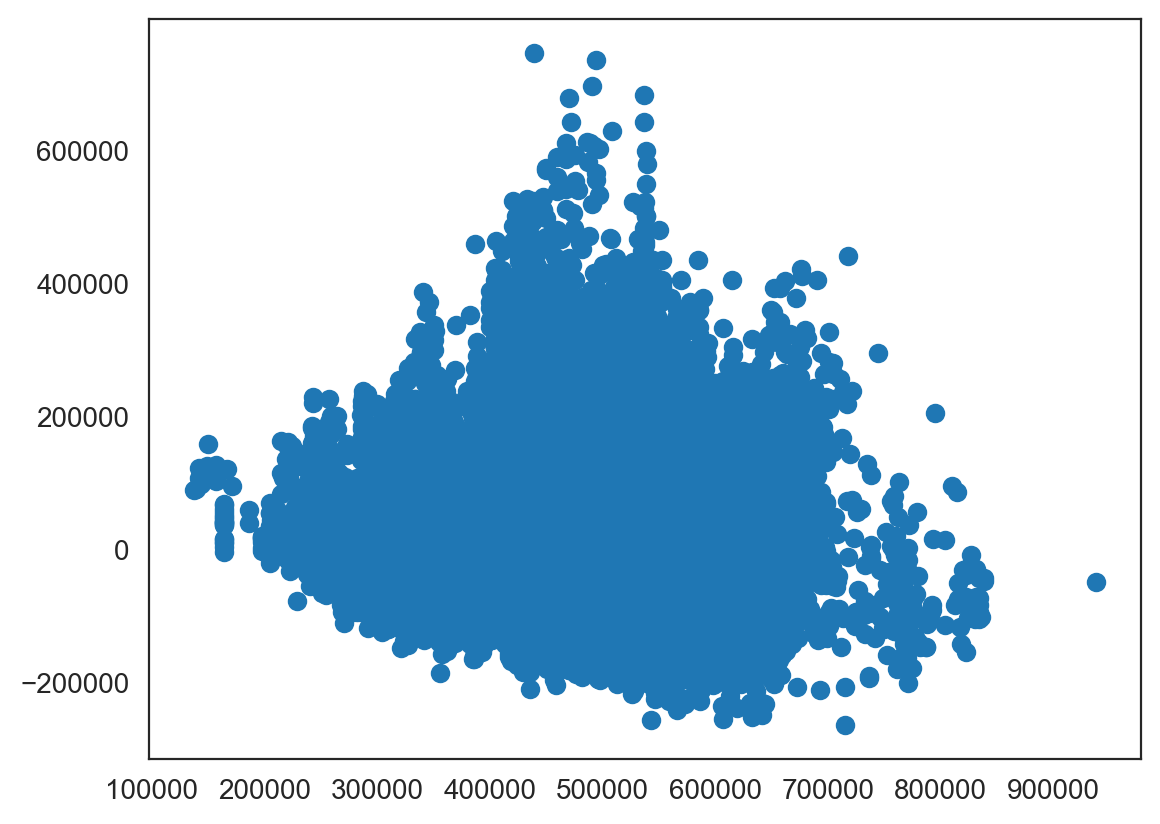

In [39]:
plt.scatter(y_pred, lasso_cv_residuals)

### ElasticNet Modelling

In [40]:
# Set up a list of alphas to check:
enet_alphas = np.linspace(0.5, 1.0, 100)
enet_ratio = 0.5

# Instantiate the model & fit:
enet = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet = enet.fit(Z_train, y_train)

# Evaluate model:
print(f'The enet R2 score for the train set is {enet.score(Z_train, y_train)}.')
print(f'The enet R2 score for the test set is {enet.score(Z_test, y_test)}.')
print(f'The enet CV score for the train set is {cross_val_score(enet, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred=enet.predict(Z_test)
y_pred_train=enet.predict(Z_train)

print(f'The enet prediction for the test set is {y_pred.mean()}.')
print(f'The enet prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
enet_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The enet RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The enet RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The enet R2 score for the train set is 0.4402430921108399.
The enet R2 score for the test set is 0.4445130738084011.
The enet CV score for the train set is 0.44021064905151397.
The enet prediction for the test set is 448437.6668496612.
The enet prediction for the train set is 449417.3612598439.
The enet RMSE for the test set is 106426.97510187121.
The enet RMSE for the train set is 107312.54033939642.


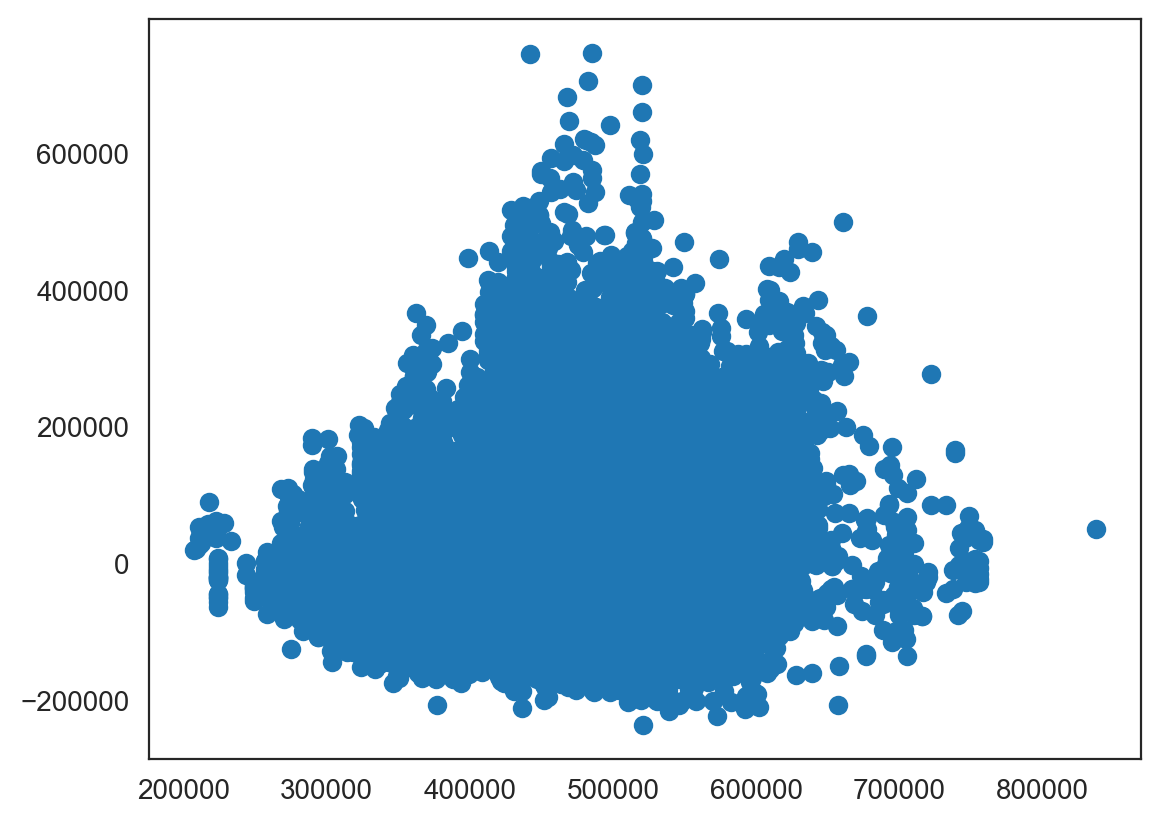

In [41]:
plt.scatter(y_pred, enet_residuals)

### Summmary of scores for the set features 1(sf1) `floor_area_sqft`,`pri_sch_nearest_distance`,`bus_stop_nearest_distance`,`mrt_nearest_distance`:

Linear Regression
- The lr R2 score for the train set is 0.46041547361915147.
- The lr R2 score for the test set is 0.4643188187125361.
- The lr CV score for the train set is 0.4603499656519089.
- The lr prediction for the test set is 448167.2772353671.
- The lr prediction for the train set is 449417.36125984386.
- The lr RMSE for the test set is 104512.44130899094.
- The lr RMSE for the train set is 105361.14662115743.

RidgeCV
- The ridge_cv R2 score for the train set is 0.4604154544552418.
- The ridge_cv R2 score for the test set is 0.46431941580999514.
- The ridge_cv CV score for the train set is 0.4603500448716746.
- The ridge_cv prediction for the test set is 448167.54248045315.
- The ridge_cv prediction for the train set is 449417.3612598439.
- The ridge_cv RMSE for the test set is 104512.38306153638.
- The ridge_cv RMSE for the train set is 105361.14849216316.

LassoCV
- The lasso_cv R2 score for the train set is 0.46041547339488254.
- The lasso_cv R2 score for the test set is 0.4643189092102431.
- The lasso_cv CV score for the train set is 0.46034996977977993.
- The lasso_cv prediction for the test set is 448167.3069765572.
- The lasso_cv prediction for the train set is 449417.3612598439.
- The lasso_cv RMSE for the test set is 104512.43248085116.
- The lasso_cv RMSE for the train set is 105361.14664305322.

Elastic Net
- The enet R2 score for the train set is 0.4402430921108399.
- The enet R2 score for the test set is 0.4445130738084011.
- The enet CV score for the train set is 0.44021064905151397.
- The enet prediction for the test set is 448437.6668496612.
- The enet prediction for the train set is 449417.3612598439.
- The enet RMSE for the test set is 106426.97510187121.
- The enet RMSE for the train set is 107312.54033939642.

### In conclusion, the best model for sf1 is RidgeCV for an r2 score of 0.46431941580999514.

## 3.  Model Set Features 2 (sf2):  `town`, `storey range`, `floor_area_sqft`,`hdb age`

In [6]:
sf2 = hdb_merged_ohe_train.drop(['mall_nearest_distance','hawker_nearest_distance','mrt_nearest_distance',
                          'mrt_nearest_distance','bus_stop_nearest_distance','pri_sch_nearest_distance','sec_sch_nearest_dist',
                          'max_floor_lvl'],axis='columns')

In [7]:
sf2.corr()['resale_price'].sort_values().round(2)

flat_type_3 ROOM             -0.51
hdb_age                      -0.35
flat_type_2 ROOM             -0.16
town_YISHUN                  -0.14
town_WOODLANDS               -0.09
storey_range_04 TO 06        -0.09
town_JURONG WEST             -0.07
town_BUKIT BATOK             -0.07
town_BEDOK                   -0.05
town_CHOA CHU KANG           -0.05
storey_range_07 TO 09        -0.05
town_SEMBAWANG               -0.04
town_JURONG EAST             -0.03
flat_type_4 ROOM             -0.02
town_GEYLANG                 -0.02
town_BUKIT PANJANG           -0.02
storey_range_01 TO 05        -0.02
town_HOUGANG                 -0.01
storey_range_10 TO 12        -0.00
storey_range_06 TO 10         0.00
storey_range_11 TO 15         0.01
town_SENGKANG                 0.02
town_CLEMENTI                 0.02
storey_range_26 TO 30         0.02
storey_range_16 TO 20         0.03
storey_range_21 TO 25         0.03
town_PUNGGOL                  0.03
town_TOA PAYOH                0.03
storey_range_49 TO 5

<AxesSubplot: title={'center': 'Correlation of resale price against other features'}>

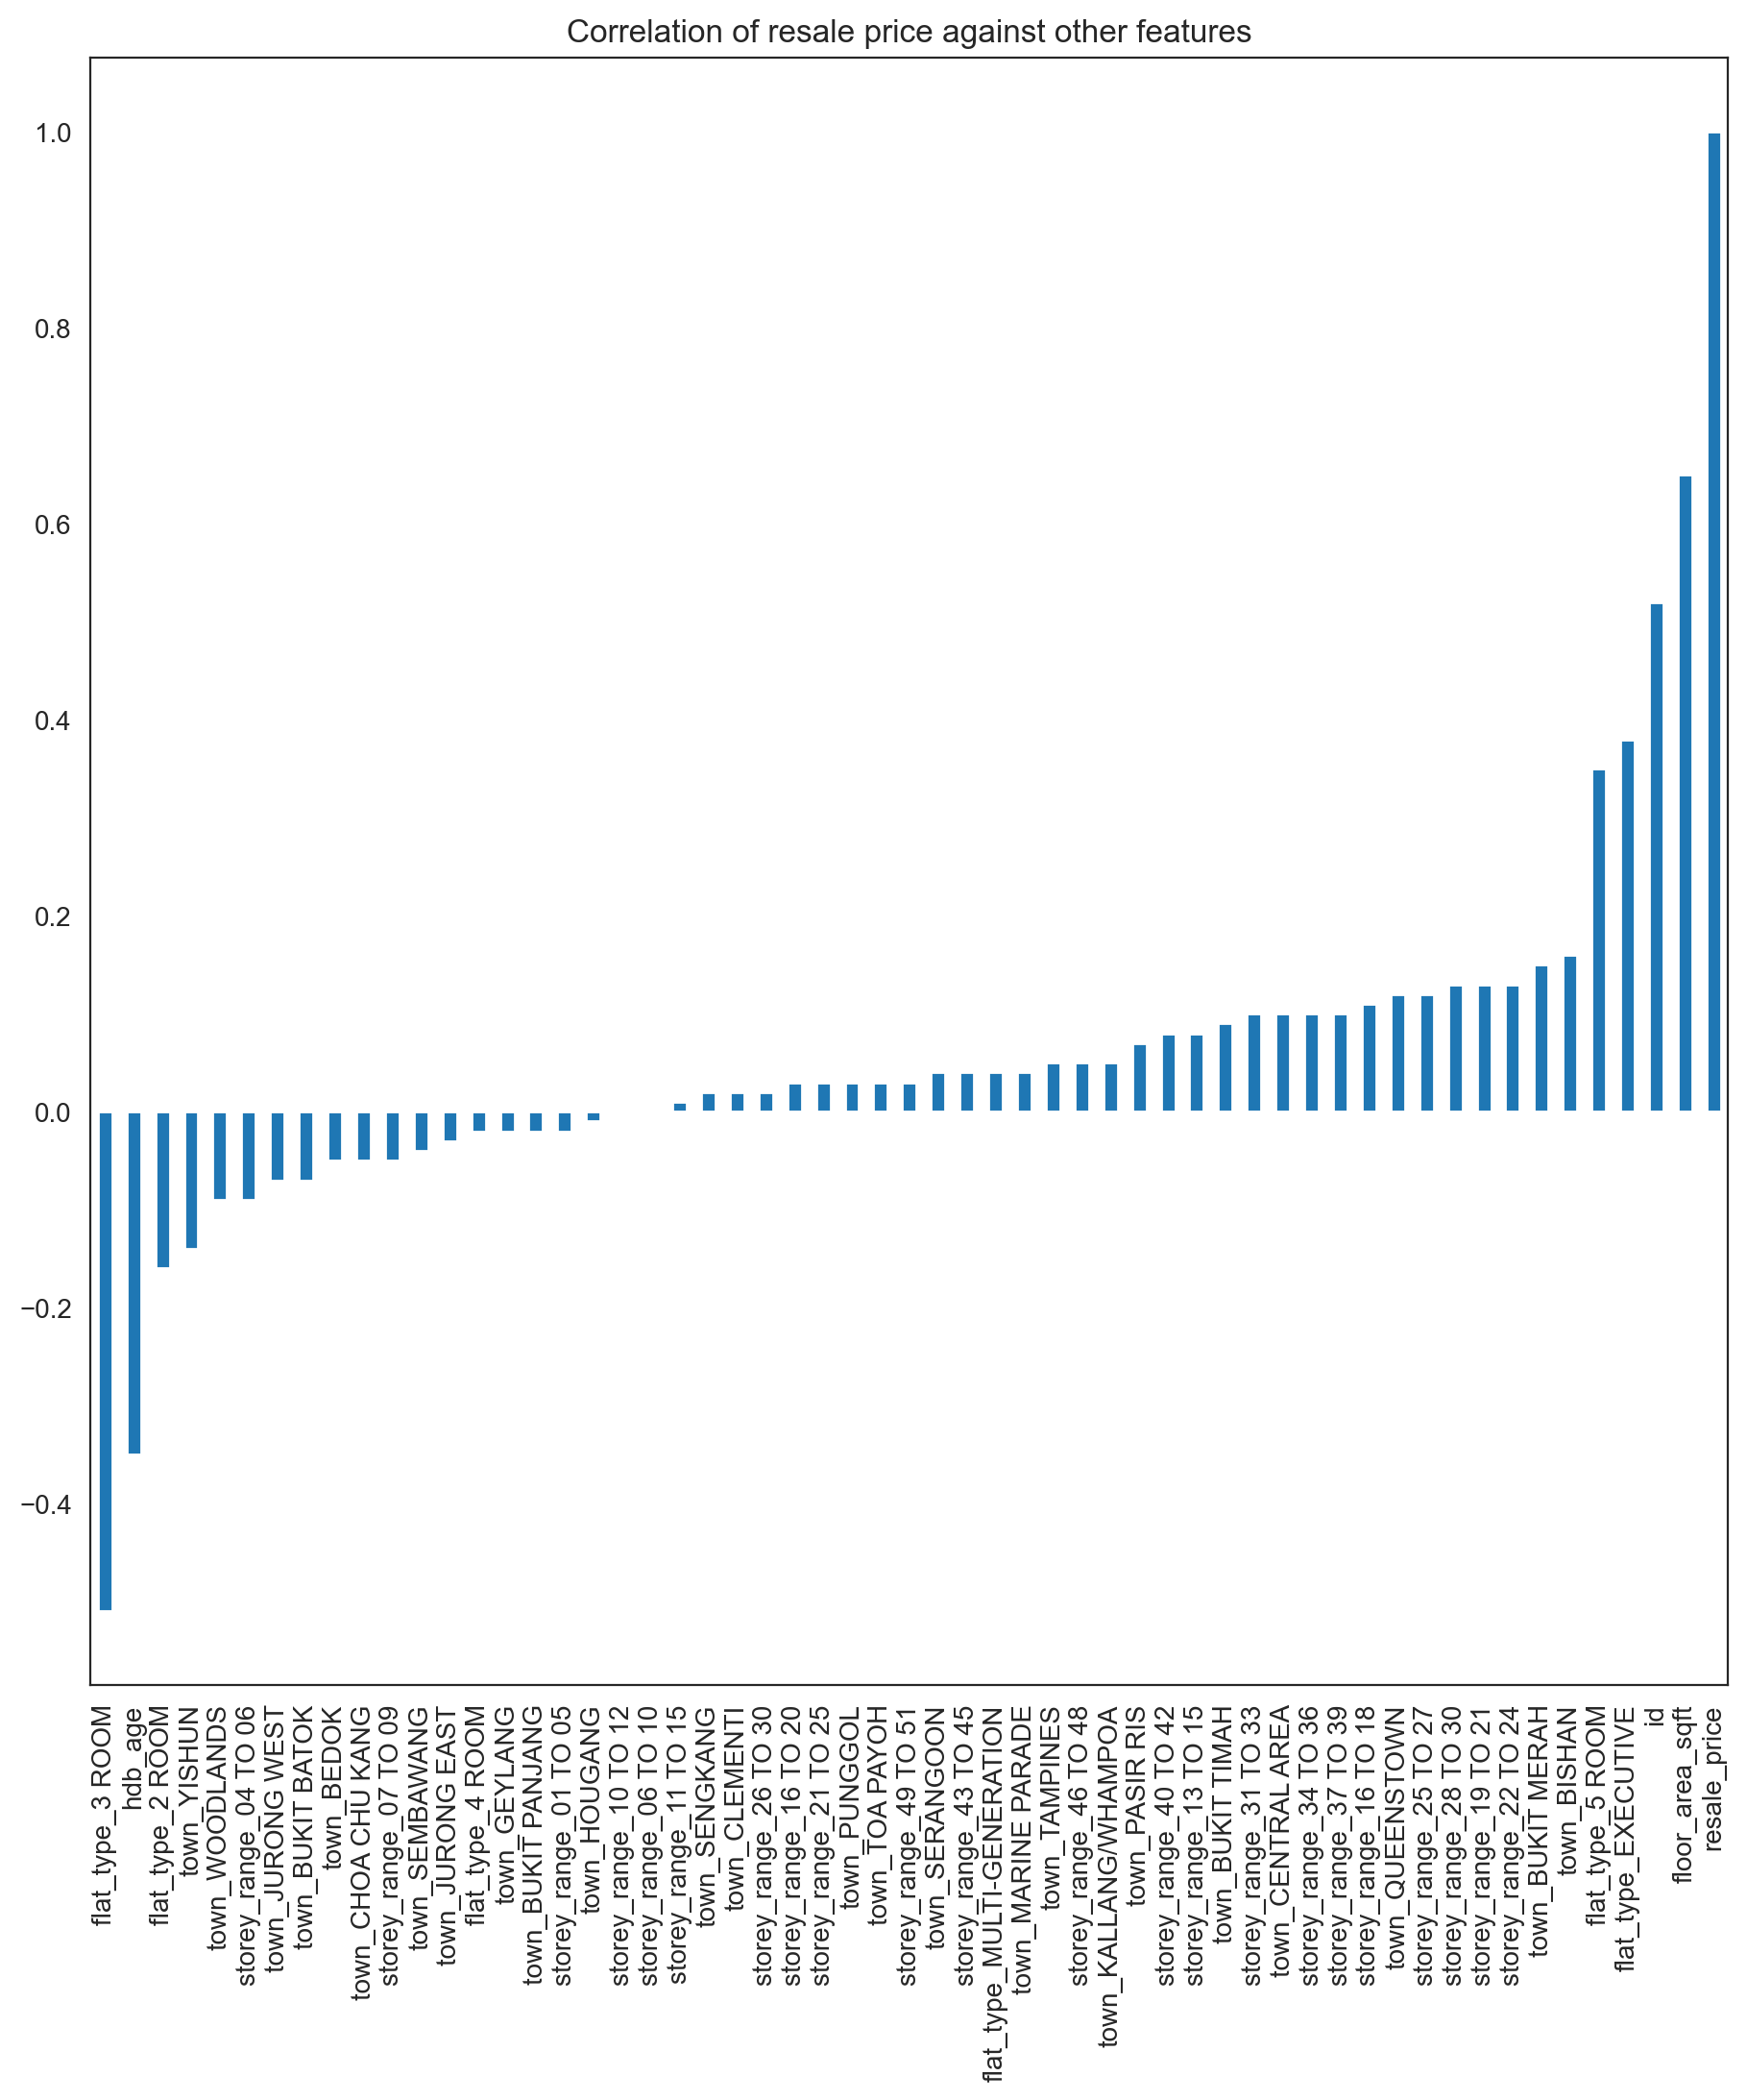

In [8]:
sf2.corr()['resale_price'].sort_values().round(2).plot(kind='bar',figsize=(11,11),title = 'Correlation of resale price against other features')

<AxesSubplot: >

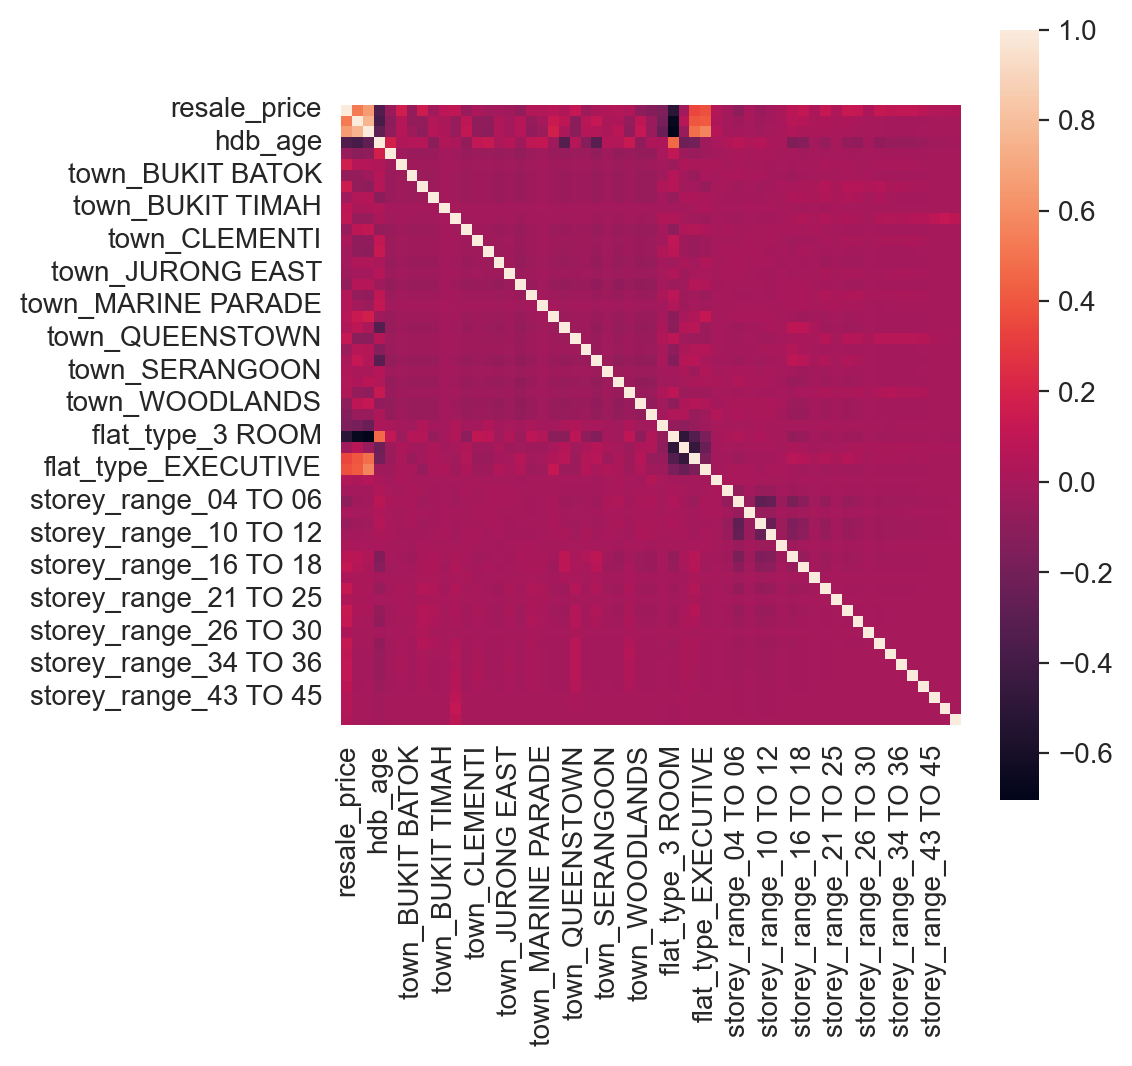

In [9]:
corr=sf2.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr,square=True)

<AxesSubplot: >

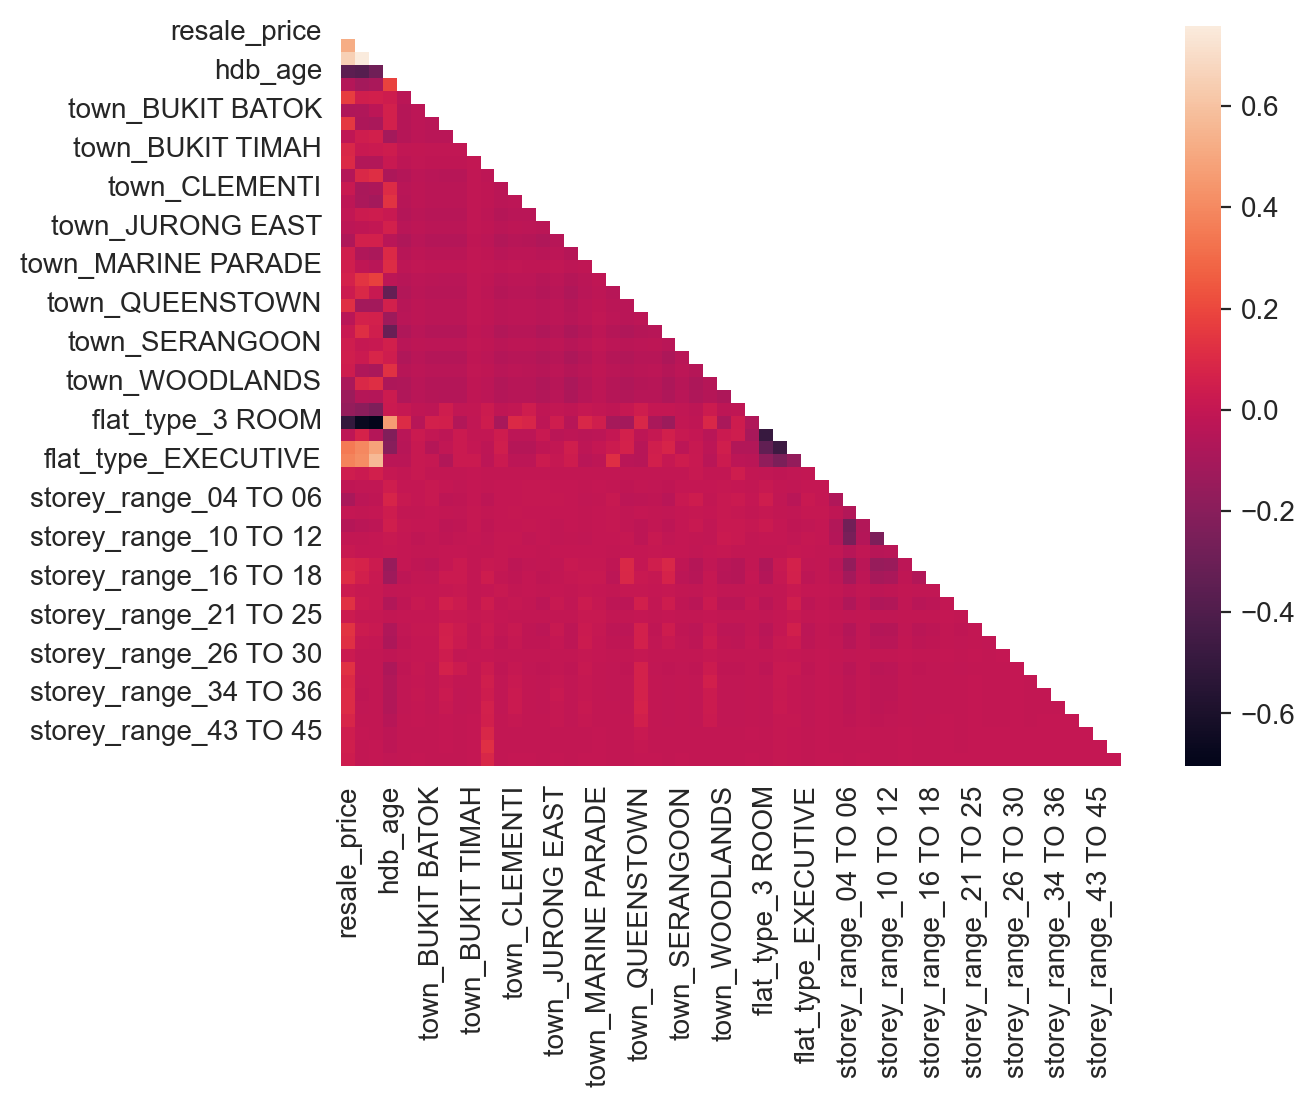

In [11]:
matrix = np.triu(corr)
sns.heatmap(corr, mask = matrix,)

### Model Preparation: Standard Scaling and train_test_split

In [12]:
#perform modelling for sf2
#set X and y variables for train_test_split
X= sf2.drop(['resale_price'],axis='columns')
y=sf2['resale_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

#apply standard scaler for sf2 
sc_sf2 = StandardScaler()
Z_train = sc_sf2.fit_transform(X_train)
Z_test = sc_sf2.transform(X_test)
print(f'sc_sf2 Z_train shape is: {Z_train.shape}')
print(f'sc_sf2 y_train shape is: {y_train.shape}')
print(f'sc_sf2 Z_test shape is: {Z_test.shape}')
print(f'sc_sf2 y_test shape is: {y_test.shape}')

sc_sf2 Z_train shape is: (120507, 56)
sc_sf2 y_train shape is: (120507,)
sc_sf2 Z_test shape is: (30127, 56)
sc_sf2 y_test shape is: (30127,)


### Linear Regression Modelling

In [13]:
# Instantiate the model & fit:
lr_sf2 = LinearRegression()
lr_sf2.fit(Z_train,y_train)

# Evaluate model:
print(f'The lr R2 score for the train set is {lr_sf2.score(Z_train, y_train)}.')
print(f'The lr R2 score for the test set is {lr_sf2.score(Z_test, y_test)}.')
print(f'The lr CV score for the train set is {cross_val_score(lr_sf2, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred = lr_sf2.predict(Z_test)
y_pred_train = lr_sf2.predict(Z_train)

print(f'The lr prediction for the test set is {y_pred.mean()}.')
print(f'The lr prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
lr_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The lr RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The lr RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The lr R2 score for the train set is 0.818603967244083.
The lr R2 score for the test set is 0.816311818087273.
The lr CV score for the train set is 0.8182965599717796.
The lr prediction for the test set is 447954.10367251665.
The lr prediction for the train set is 449417.36125984386.
The lr RMSE for the test set is 61200.56133606901.
The lr RMSE for the train set is 61089.22803111137.


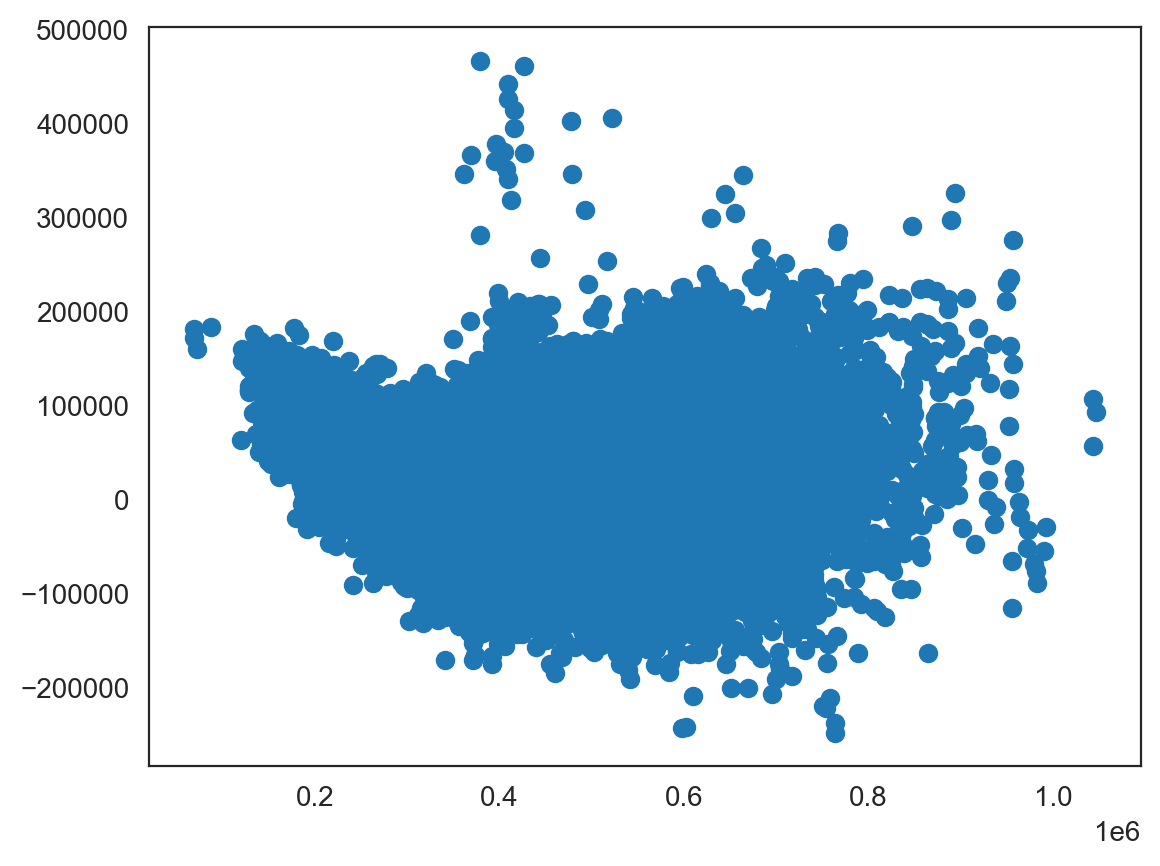

In [78]:
plt.scatter(y_pred, lr_residuals)

### Ridge CV Modelling

In [26]:
# Set up a list of ridge alphas to check:
r_alphas = np.logspace(0, 5, 100)

# Instantiate the model & fit:
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=10)
ridge_cv = ridge_cv.fit(Z_train, y_train)

# Evaluate model:
print(f'The ridge_cv R2 score for the train set is {ridge_cv.score(Z_train, y_train)}.')
print(f'The ridge_cv R2 score for the test set is {ridge_cv.score(Z_test, y_test)}.')
print(f'The ridge_cv CV score for the train set is {cross_val_score(ridge_cv, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred=ridge_cv.predict(Z_test)
y_pred_train=ridge_cv.predict(Z_train)

print(f'The ridge_cv prediction for the test set is {y_pred.mean()}.')
print(f'The ridge_cv prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
ridgecv_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The ridge_cv RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The ridge_cv RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The ridge_cv R2 score for the train set is 0.8186039369263864.
The ridge_cv R2 score for the test set is 0.8163114231578417.
The ridge_cv CV score for the train set is 0.8182965789740371.
The ridge_cv prediction for the test set is 447954.2544491948.
The ridge_cv prediction for the train set is 449417.3612598439.
The ridge_cv RMSE for the test set is 61200.627126610474.
The ridge_cv RMSE for the train set is 61089.23313619712.


In [28]:
ridge_cv.coef_

array([ -1648.43664621,  81568.42283518, -51270.93441717,  -4293.65074036,
        10792.83309524, -15883.05386191,  17478.79626082, -26386.89517889,
         8846.31042339,  11414.11070088, -34171.78518221,   5290.07048632,
         4033.77030643, -16772.73217358, -10133.65480852, -33774.61443579,
         8028.8731636 ,  10626.10647874, -19329.17202176, -27700.85585216,
        16213.32082791, -28741.36379105, -36095.80257129,  -1636.8550336 ,
       -12862.38414974,   6487.04183274, -42117.40694636, -26292.69958625,
         3122.7238204 ,  30256.05312424,  44118.11369292,  47096.76726333,
        42495.72359578,   4713.17299203,   3261.5356802 ,   5433.45833724,
         4773.06212619,   9377.71433949,  11986.92758905,   4489.57359664,
        11258.25613092,  11278.79268122,   3255.15110768,  11693.0738689 ,
         2540.55795918,  11106.08500839,   9403.14726351,   1504.89306753,
         9703.26328037,   7639.92081111,   7981.83434277,   8335.18215417,
         5589.35224154,  

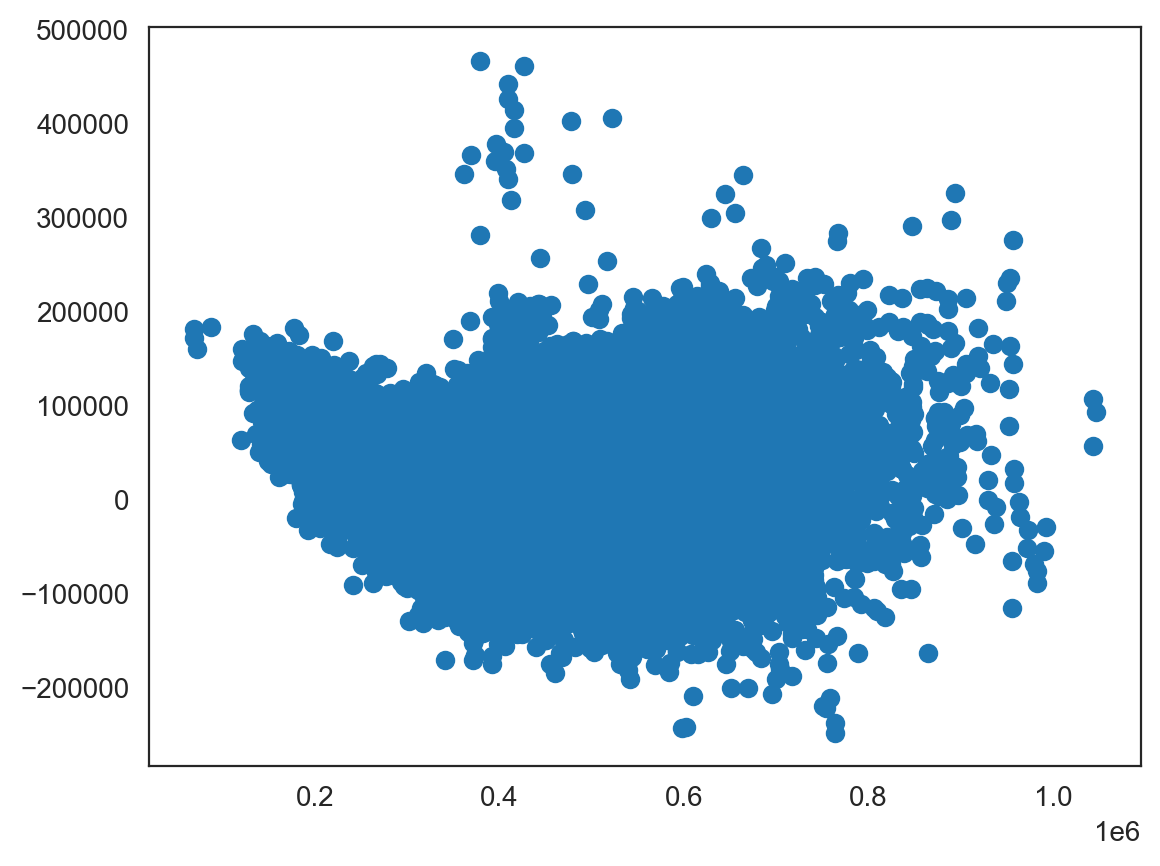

In [29]:
plt.scatter(y_pred, ridgecv_residuals)

### Lasso CV Modelling

In [30]:
# Set up a list of Lasso alphas to check:
l_alphas = np.logspace(-3, 0, 100)

# Instantiate the model & fit:
lasso_cv = LassoCV(alphas=l_alphas, cv=10, max_iter=50000)
lasso_cv.fit(Z_train, y_train);

# Evaluate model:
print(f'The lasso_cv R2 score for the train set is {lasso_cv.score(Z_train, y_train)}.')
print(f'The lasso_cv R2 score for the test set is {lasso_cv.score(Z_test, y_test)}.')
print(f'The lasso_cv CV score for the train set is {cross_val_score(lasso_cv, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred=lasso_cv.predict(Z_test)
y_pred_train=lasso_cv.predict(Z_train)

print(f'The lasso_cv prediction for the test set is {y_pred.mean()}.')
print(f'The lasso_cv prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
lasso_cv_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The lasso_cv RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The lasso_cv RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The lasso_cv R2 score for the train set is 0.8186039644653774.
The lasso_cv R2 score for the test set is 0.8163117479767354.
The lasso_cv CV score for the train set is 0.8182965707389739.
The lasso_cv prediction for the test set is 447954.1482853938.
The lasso_cv prediction for the train set is 449417.36125984386.
The lasso_cv RMSE for the test set is 61200.573015655034.
The lasso_cv RMSE for the train set is 61089.22849900743.


In [31]:
lasso_cv.coef_

array([ -1650.30394804,  81560.68701429, -51271.28667282,  -4295.50308568,
        10791.85261108, -15884.57392279,  17479.2943005 , -26388.64180448,
         8845.94522108,  11413.39047309, -34173.42807755,   5288.87694289,
         4032.30392881, -16774.49023658, -10134.71150967, -33777.03531818,
         8027.5287268 ,  10625.51652738, -19330.37182894, -27703.19916357,
        16212.02883948, -28743.15967884, -36098.56357376,  -1637.94153466,
       -12864.20477068,   6485.6911251 , -42119.7105396 , -26294.91451289,
         3206.59750167,  30592.60212972,  44501.11148848,  47434.87207133,
        42712.26678478,   4729.46551246,   3261.34443908,   5433.2028161 ,
         4772.8974853 ,   9377.45042429,  11986.73471179,   4489.40743458,
        11257.85655   ,  11278.44224223,   3254.9870284 ,  11692.70556946,
         2540.38648617,  11105.71871677,   9402.76385336,   1504.67154244,
         9702.85476569,   7639.67706029,   7981.57451548,   8334.95565058,
         5589.17561219,  

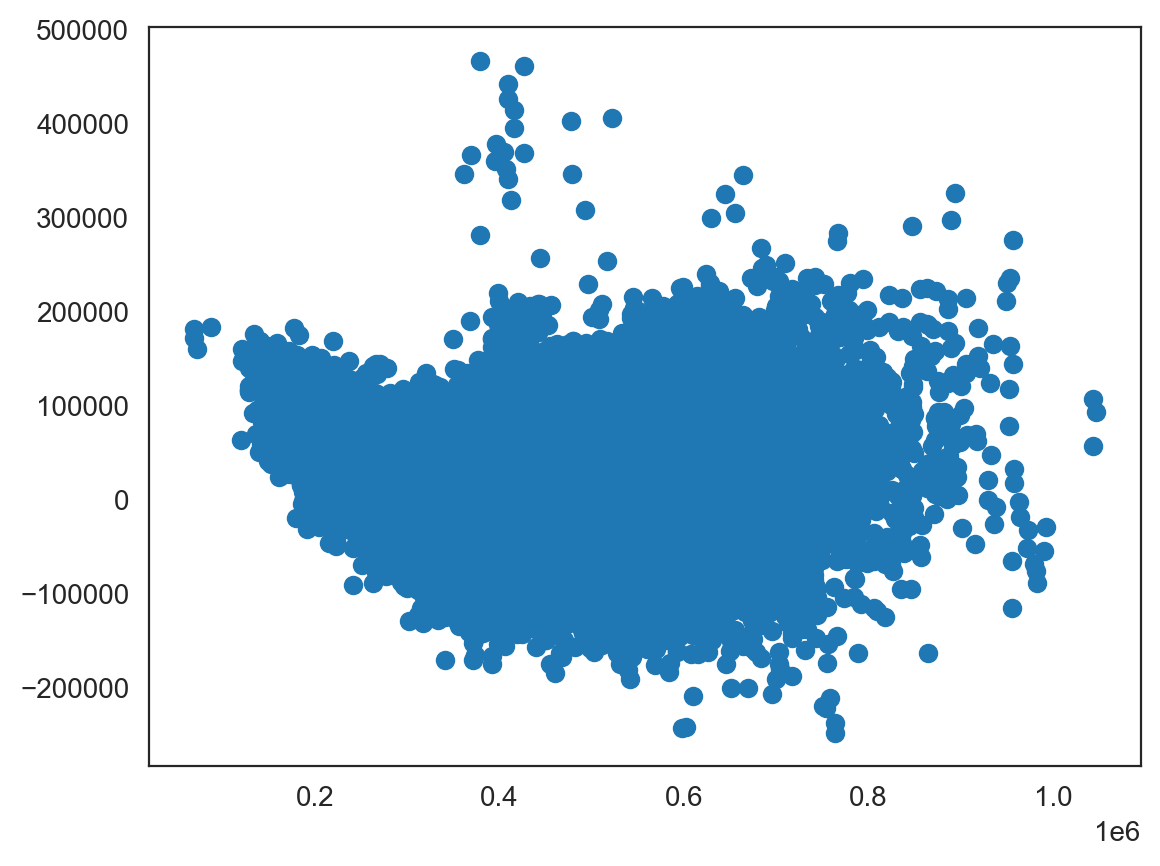

In [32]:
plt.scatter(y_pred, lasso_cv_residuals)

### ElasticNet Modelling

In [33]:
# Set up a list of alphas to check:
enet_alphas = np.linspace(0.5, 1.0, 100)
enet_ratio = 0.5

# Instantiate the model & fit:
enet = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet = enet.fit(Z_train, y_train)

# Evaluate model:
print(f'The enet R2 score for the train set is {enet.score(Z_train, y_train)}.')
print(f'The enet R2 score for the test set is {enet.score(Z_test, y_test)}.')
print(f'The enet CV score for the train set is {cross_val_score(enet, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred=enet.predict(Z_test)
y_pred_train=enet.predict(Z_train)

print(f'The enet prediction for the test set is {y_pred.mean()}.')
print(f'The enet prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
enet_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The enet RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The enet RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The enet R2 score for the train set is 0.7749042210657171.
The enet R2 score for the test set is 0.7740026318046487.
The enet CV score for the train set is 0.7746197156664593.
The enet prediction for the test set is 448261.14568561356.
The enet prediction for the train set is 449417.3612598438.
The enet RMSE for the test set is 67883.85365912029.
The enet RMSE for the train set is 68050.98572100226.


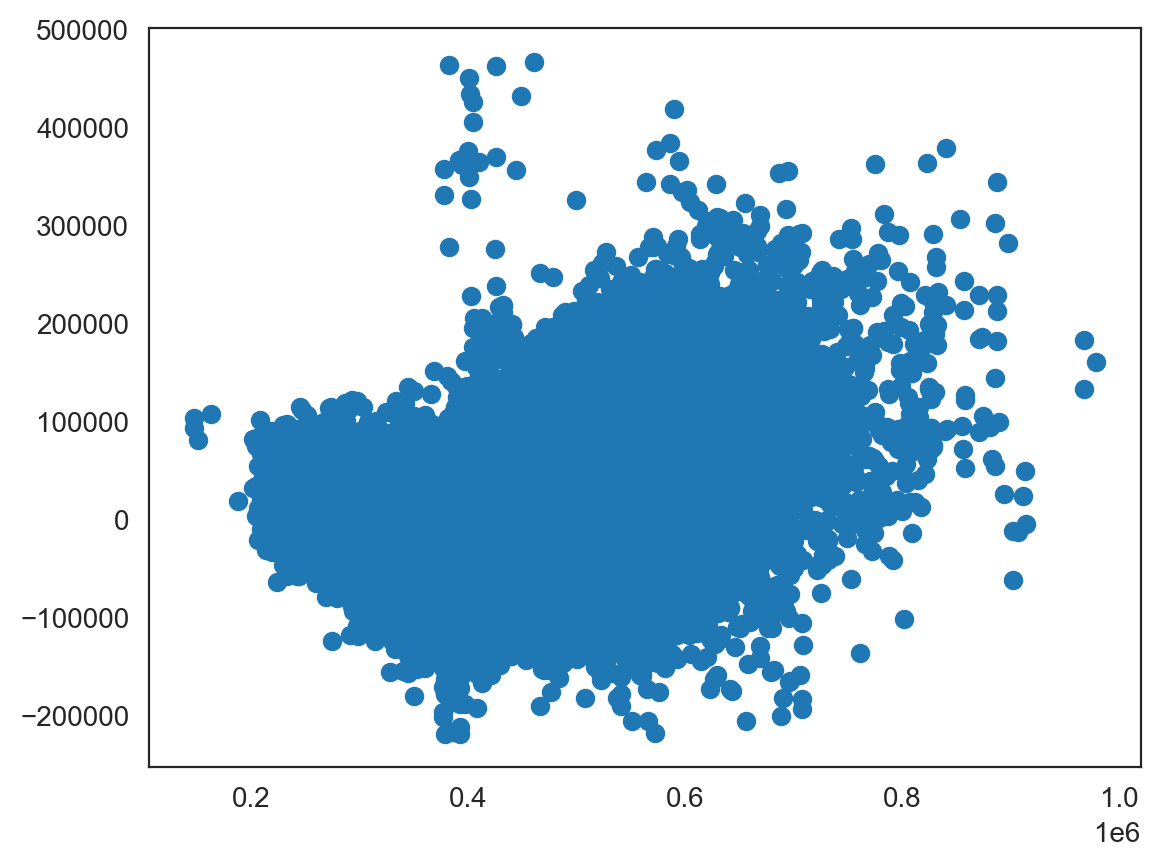

In [34]:
plt.scatter(y_pred, enet_residuals)

### Summmary of scores for the set features 2(sf2) `town`, `storey range`, `floor_area_sqft`,`hdb age`:

Linear Regression
- The lr R2 score for the train set is 0.818603967244083.
- The lr R2 score for the test set is 0.816311818087273.
- The lr CV score for the train set is 0.8182965599717796.
- The lr prediction for the test set is 447954.10367251665.
- The lr prediction for the train set is 449417.36125984386.
- The lr RMSE for the test set is 61200.56133606901.
- The lr RMSE for the train set is 61089.22803111137.

RidgeCV
- The ridge_cv R2 score for the train set is 0.8186039369263864.
- The ridge_cv R2 score for the test set is 0.8163114231578417.
- The ridge_cv CV score for the train set is 0.8182965789740371.
- The ridge_cv prediction for the test set is 447954.2544491948.
- The ridge_cv prediction for the train set is 449417.3612598439.
- The ridge_cv RMSE for the test set is 61200.627126610474.
- The ridge_cv RMSE for the train set is 61089.23313619712.

LassoCV
- The lasso_cv R2 score for the train set is 0.8186039644653774.
- The lasso_cv R2 score for the test set is 0.8163117479767354.
- The lasso_cv CV score for the train set is 0.8182965707389739.
- The lasso_cv prediction for the test set is 447954.1482853938.
- The lasso_cv prediction for the train set is 449417.36125984386.
- The lasso_cv RMSE for the test set is 61200.573015655034.
- The lasso_cv RMSE for the train set is 61089.22849900743.

Elastic Net
- The enet R2 score for the train set is 0.7749042210657171.
- The enet R2 score for the test set is 0.7740026318046487.
- The enet CV score for the train set is 0.7746197156664593.
- The enet prediction for the test set is 448261.14568561356.
- The enet prediction for the train set is 449417.3612598438.
- The enet RMSE for the test set is 67883.85365912029.
- The enet RMSE for the train set is 68050.98572100226.

## In conclusion, the best model for sf2 is Linear Regresson for  a score of  0.8162872559041964.

## 4. Model Set Features 3  (sf3): `floor_area_sqft`,`pri_sch_nearest_distance`,`bus_stop_nearest_distance`,`mrt_nearest_distance`,`hawker_nearest_distance`,`mall_nearest_distance`

In [42]:
sf3 = hdb_merged_ohe_train[['resale_price','floor_area_sqft','pri_sch_nearest_distance','bus_stop_nearest_distance','mrt_nearest_distance','hawker_nearest_distance','mall_nearest_distance']]

In [43]:
sf3.corr()['resale_price'].sort_values().round(2)

mrt_nearest_distance        -0.13
mall_nearest_distance       -0.09
hawker_nearest_distance     -0.01
pri_sch_nearest_distance    -0.01
bus_stop_nearest_distance    0.03
floor_area_sqft              0.65
resale_price                 1.00
Name: resale_price, dtype: float64

<AxesSubplot: title={'center': 'Correlation of resale price against other features'}>

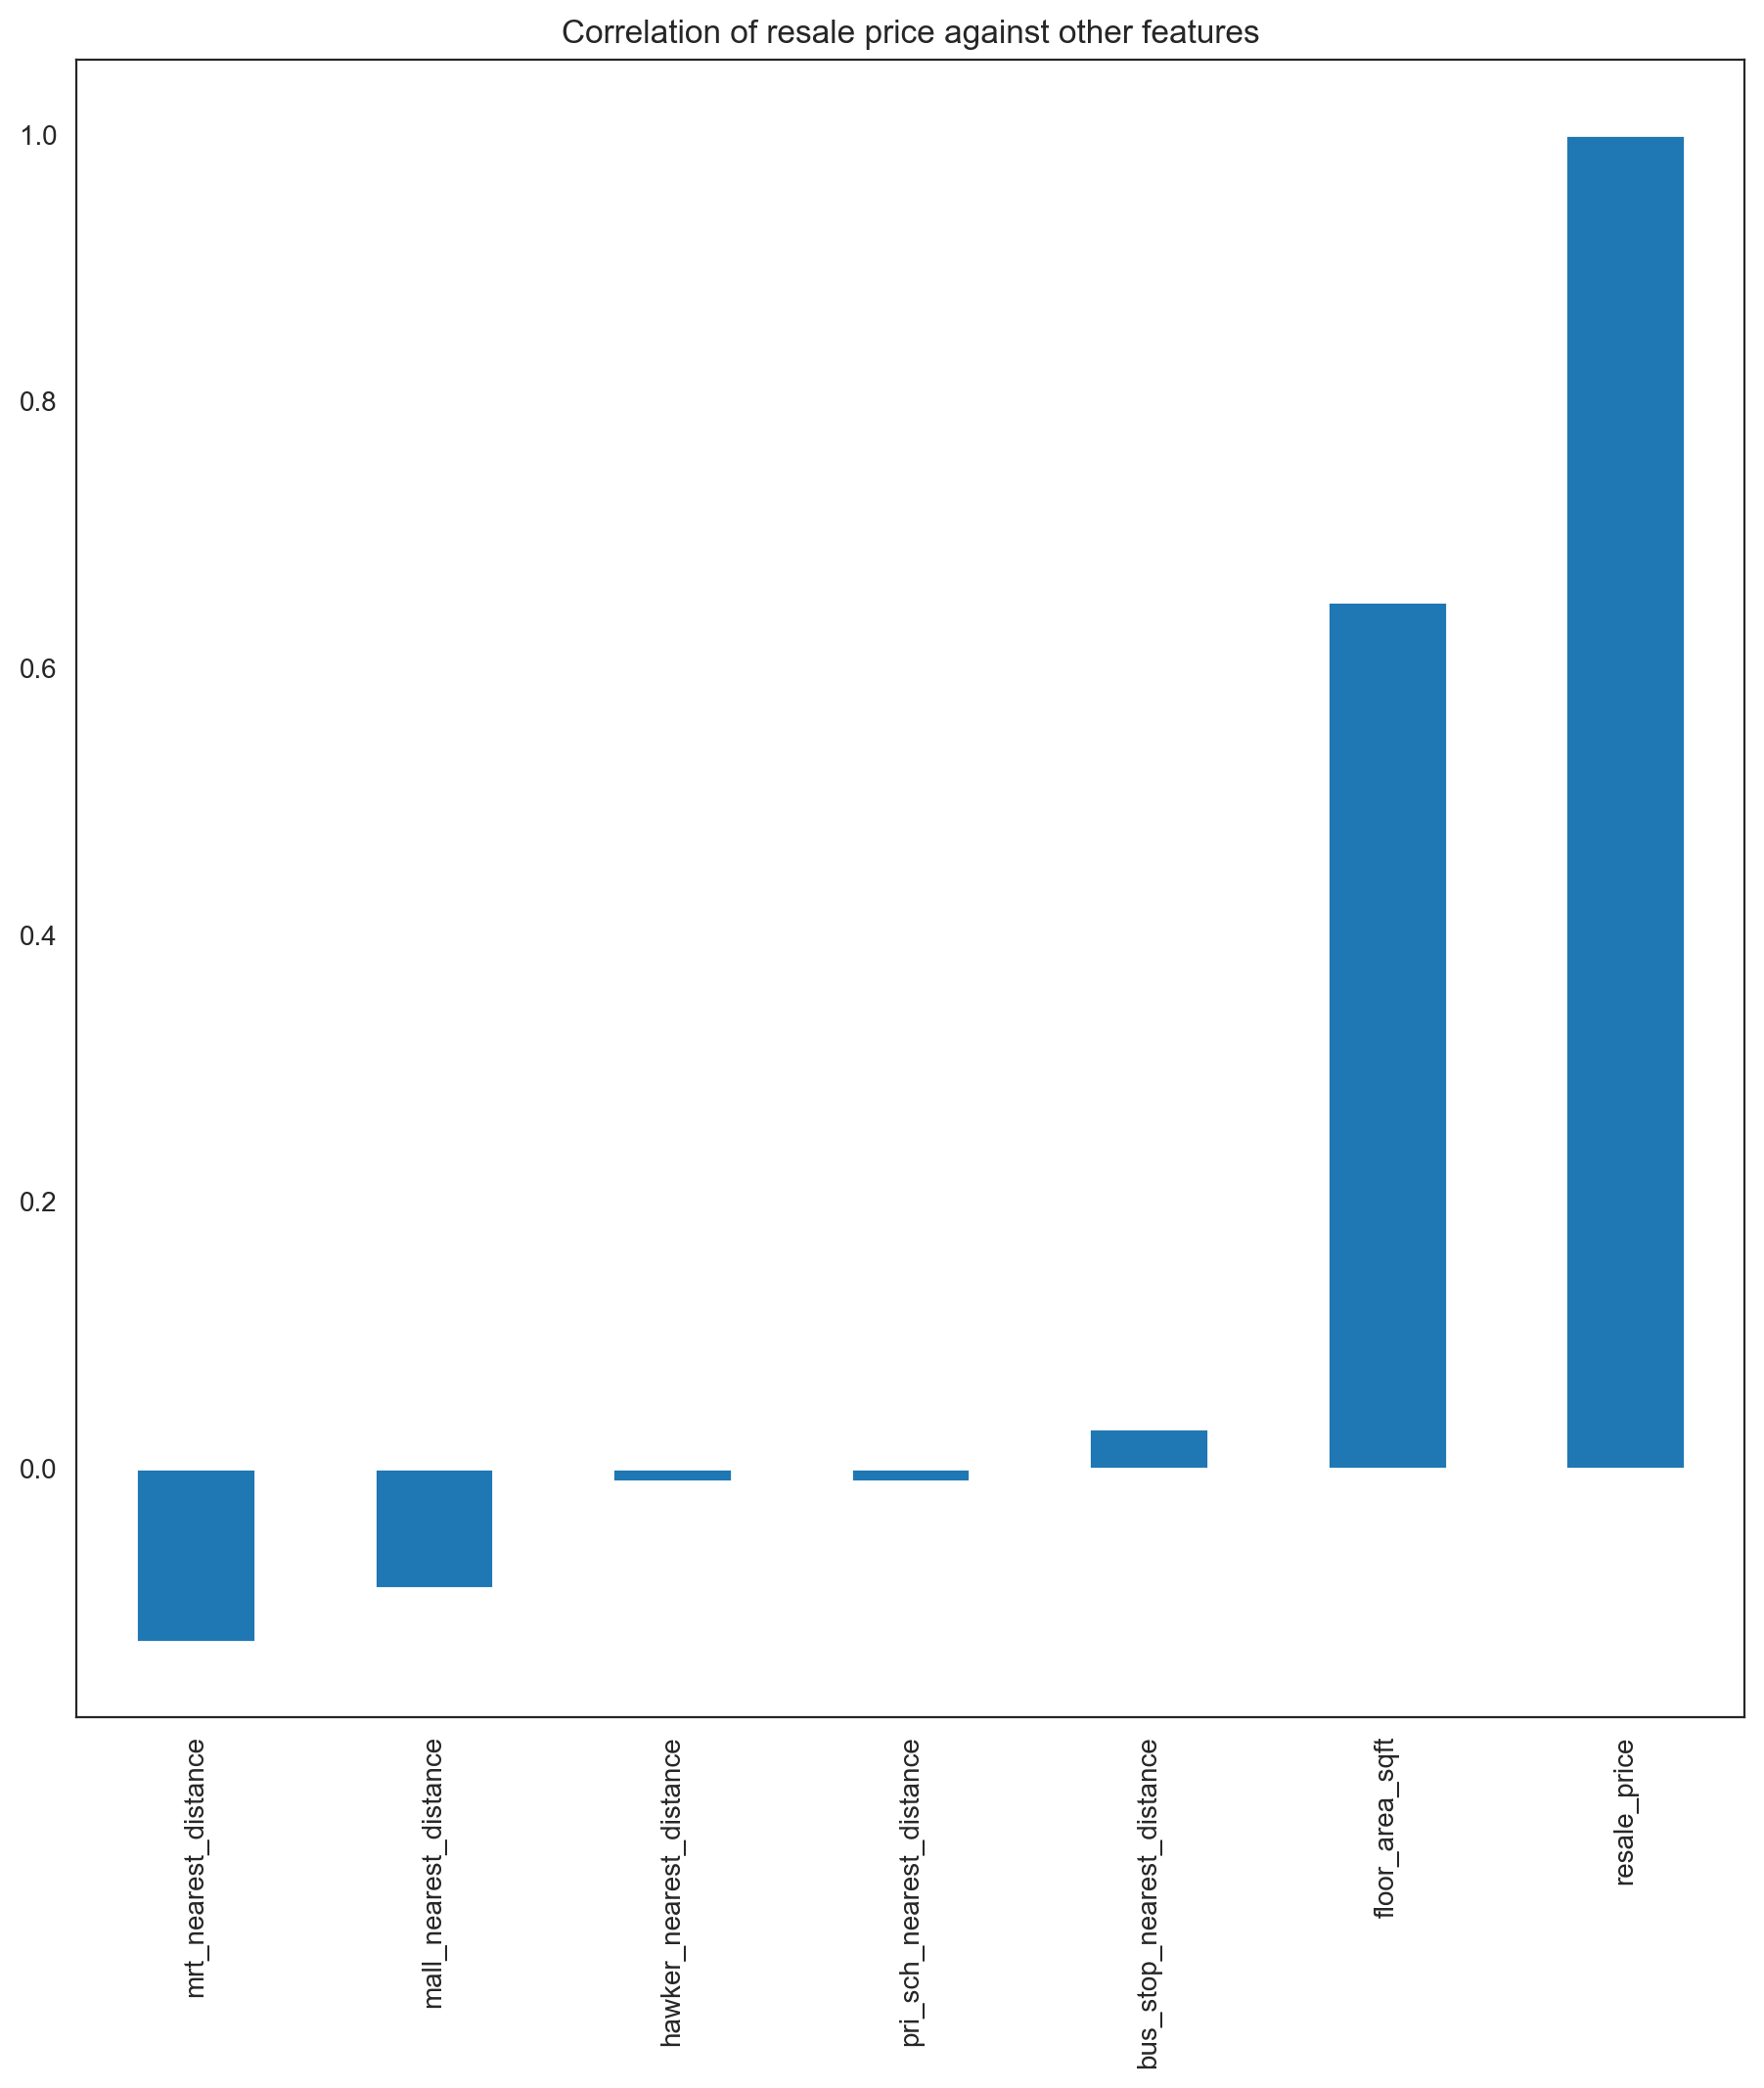

In [44]:
sf3.corr()['resale_price'].sort_values().round(2).plot(kind='bar',figsize=(11,11),title = 'Correlation of resale price against other features')

<AxesSubplot: >

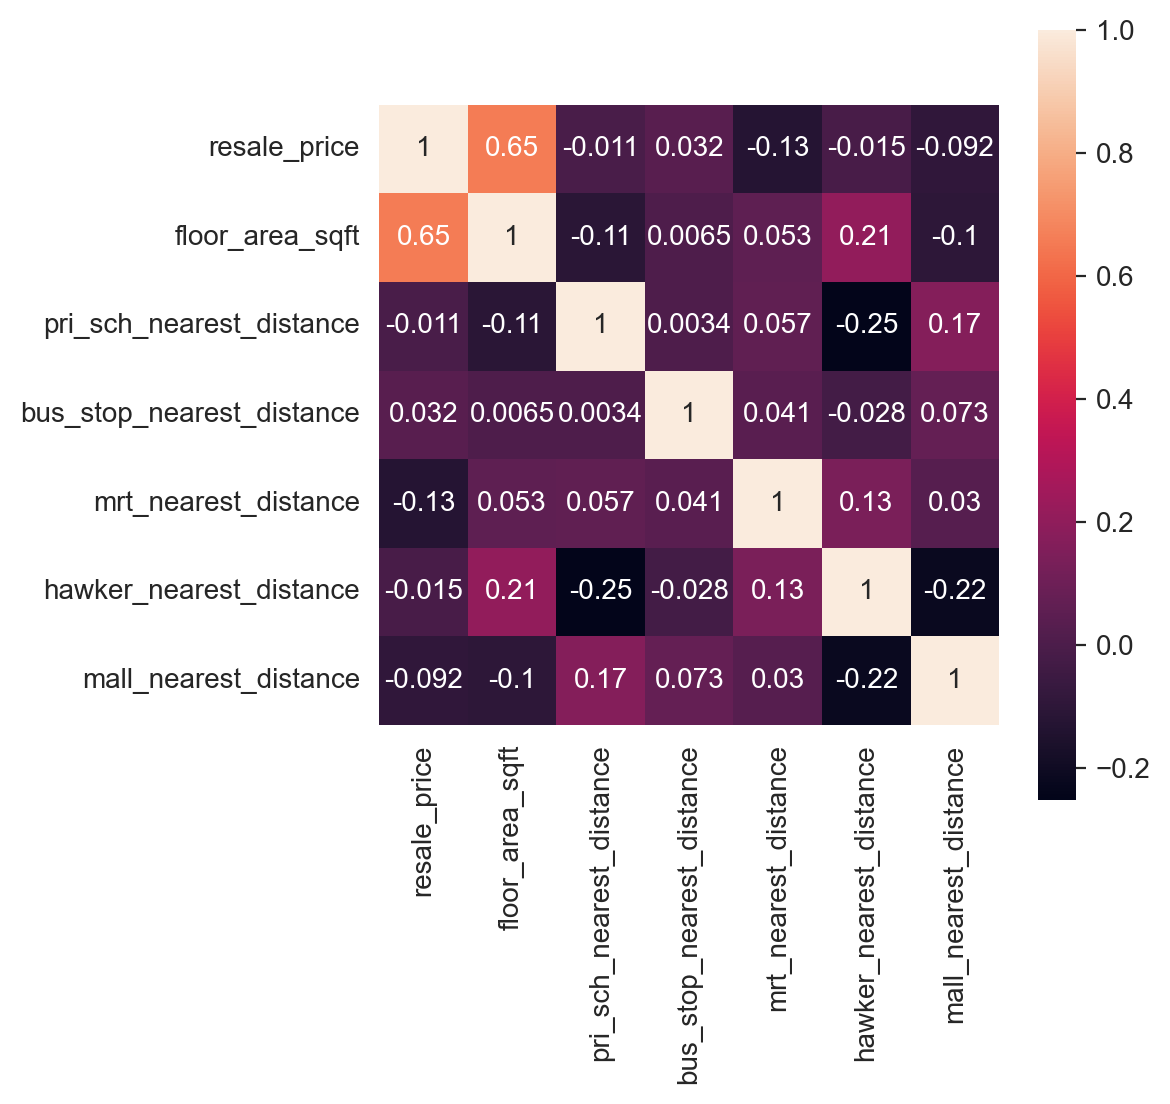

In [45]:
corr=sf3.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr,square=True,annot=True)

<AxesSubplot: >

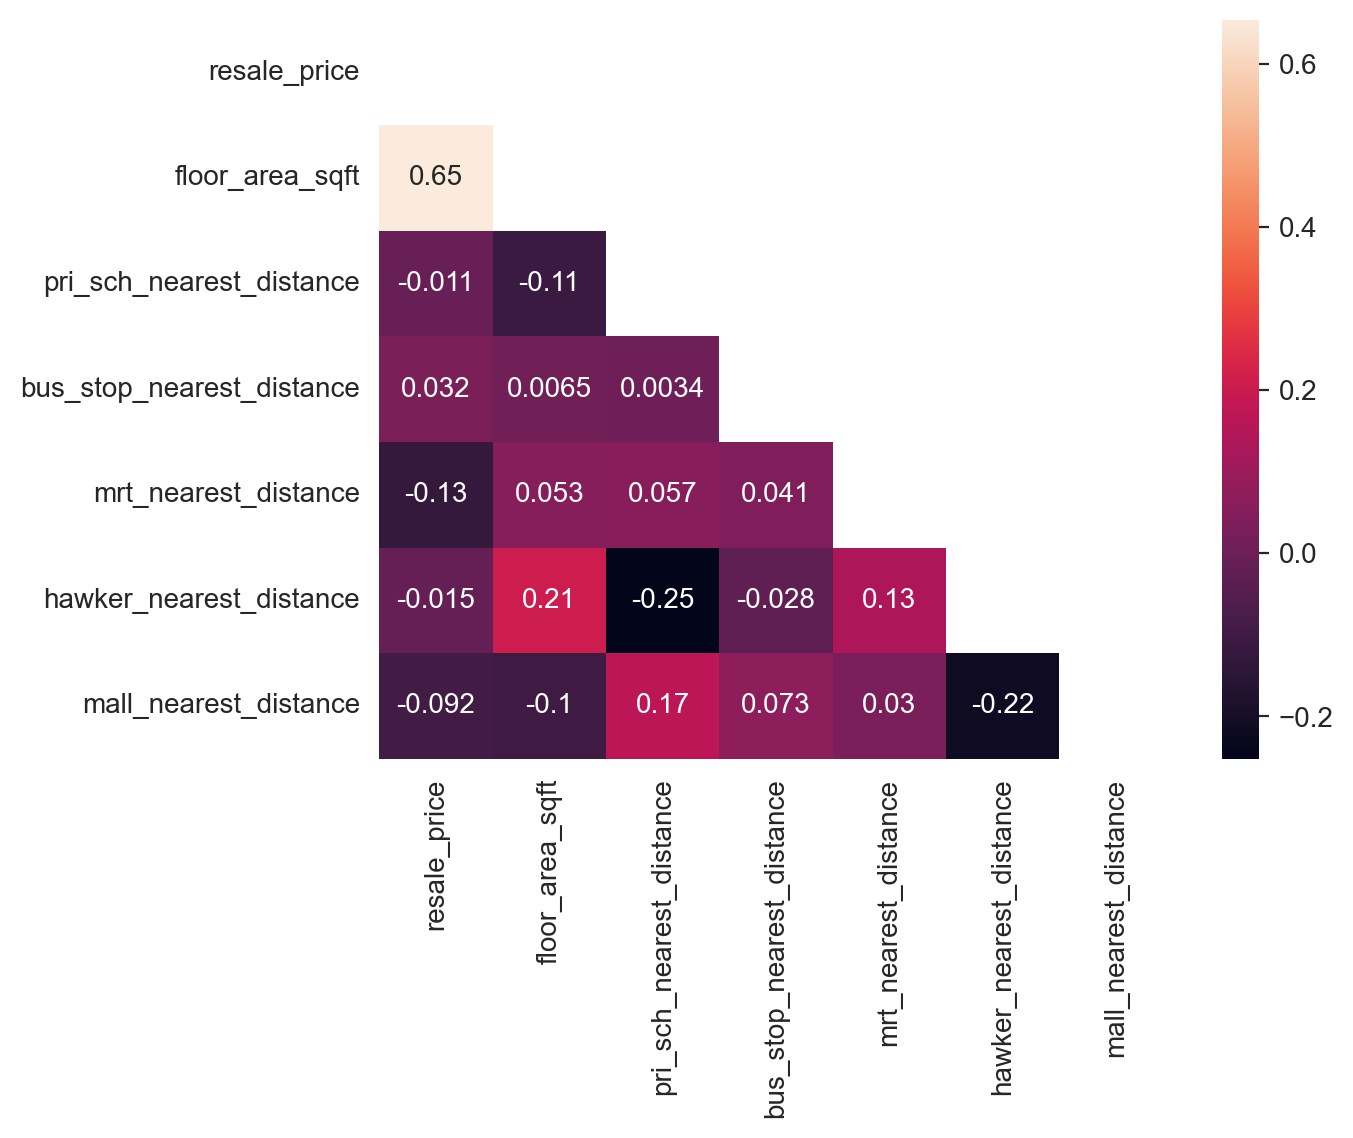

In [46]:
matrix = np.triu(corr)
sns.heatmap(corr, mask = matrix,annot=True)

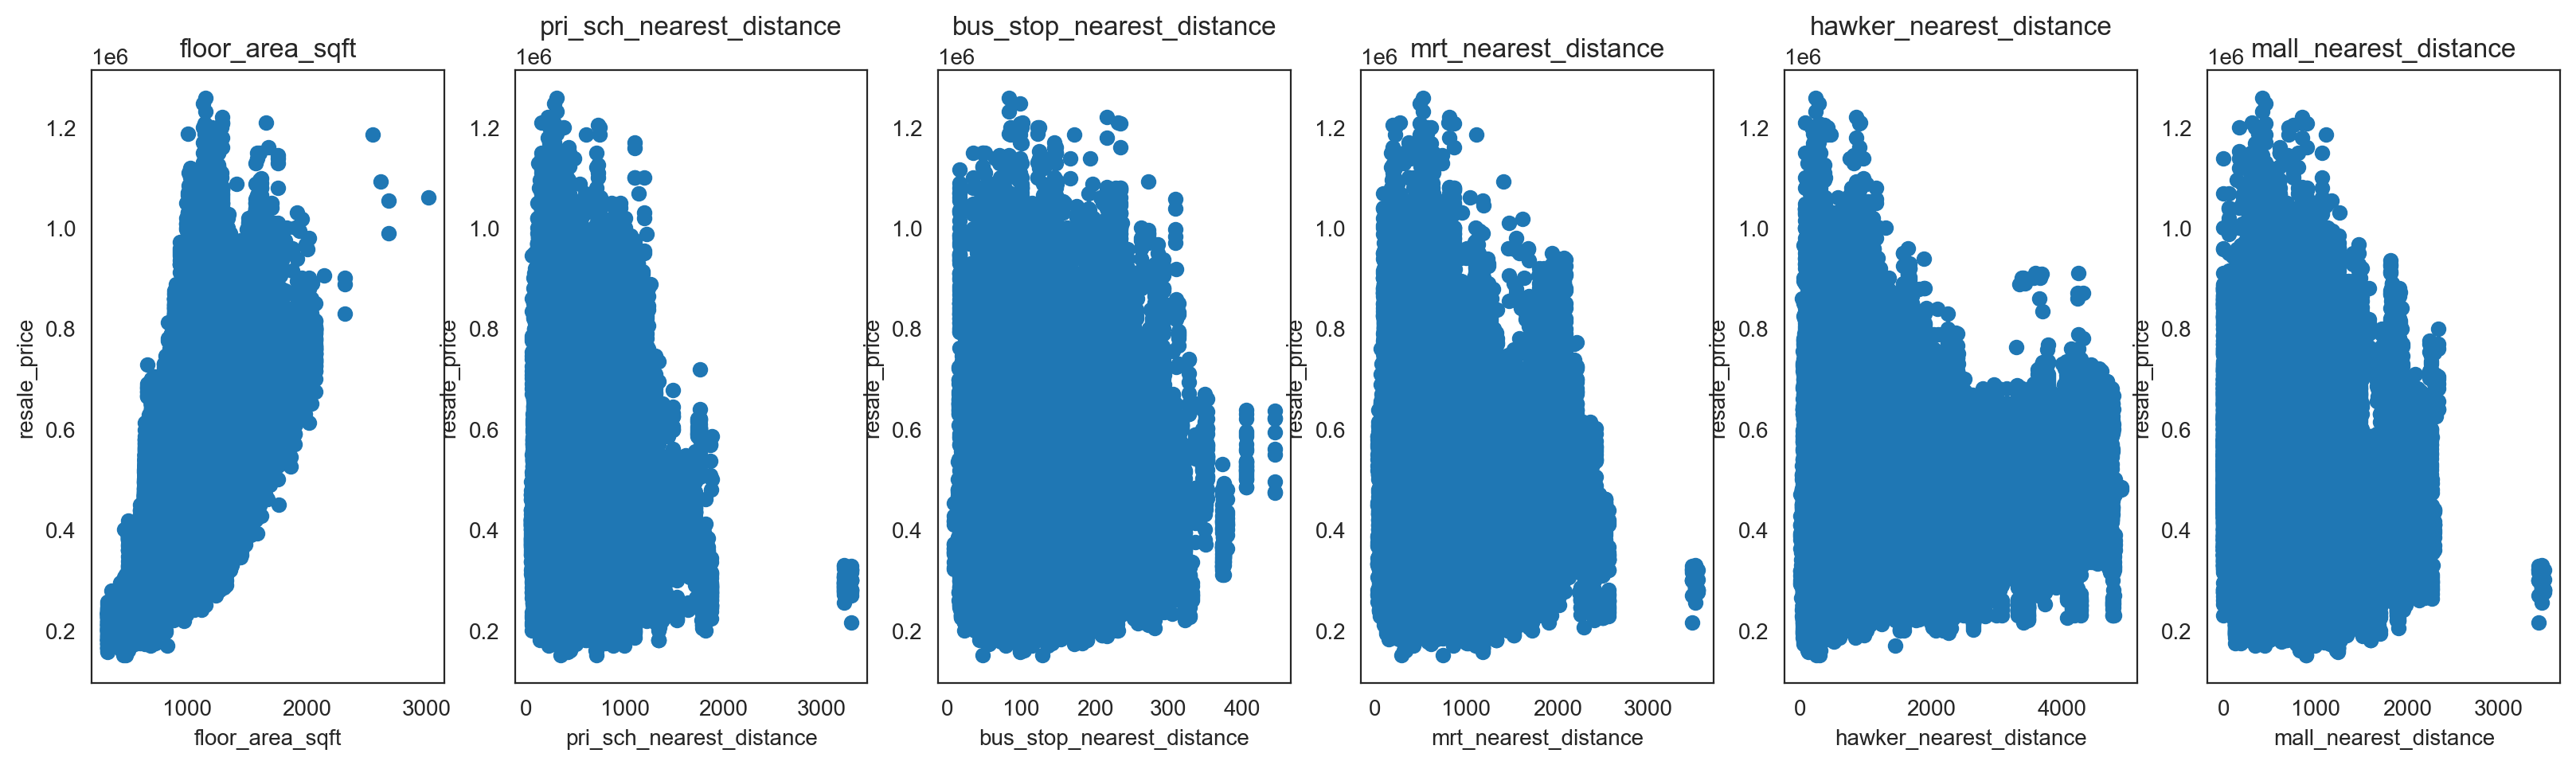

In [47]:
plt.figure(figsize=(20,5))

features = ['floor_area_sqft','pri_sch_nearest_distance','bus_stop_nearest_distance','mrt_nearest_distance','hawker_nearest_distance','mall_nearest_distance']
target = sf3['resale_price']

for i, col in enumerate(features):
    plt.subplot(1,len(features), i+1)
    x=sf3[col]
    y=target
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('resale_price')

### Model Preparation: Standard Scaling and train_test_split

In [48]:
#perform modelling for sf3
#set X and y variables for train_test_split
X= sf3.drop(['resale_price'],axis='columns')
y=sf3['resale_price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

#apply standard scaler for sf3 
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
print(f'sf3 Z_train shape is: {Z_train.shape}')
print(f'sf3 y_train shape is: {y_train.shape}')
print(f'sf3 Z_test shape is: {Z_test.shape}')
print(f'sf3 y_test shape is: {y_test.shape}')

sf3 Z_train shape is: (120507, 6)
sf3 y_train shape is: (120507,)
sf3 Z_test shape is: (30127, 6)
sf3 y_test shape is: (30127,)


### Linear Regression Modelling

In [49]:
# Instantiate the model & fit:
lr = LinearRegression()
lr.fit(Z_train,y_train)

# Evaluate model:
print(f'The lr R2 score for the train set is {lr.score(Z_train, y_train)}.')
print(f'The lr R2 score for the test set is {lr.score(Z_test, y_test)}.')
print(f'The lr CV score for the train set is {cross_val_score(lr, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred = lr.predict(Z_test)
y_pred_train = lr.predict(Z_train)

print(f'The lr prediction for the test set is {y_pred.mean()}.')
print(f'The lr prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
lr_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The lr RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The lr RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The lr R2 score for the train set is 0.4774218218151932.
The lr R2 score for the test set is 0.4811813774057705.
The lr CV score for the train set is 0.4773246297790653.
The lr prediction for the test set is 448087.7831320839.
The lr prediction for the train set is 449417.3612598439.
The lr RMSE for the test set is 102854.32914330701.
The lr RMSE for the train set is 103687.49444047747.


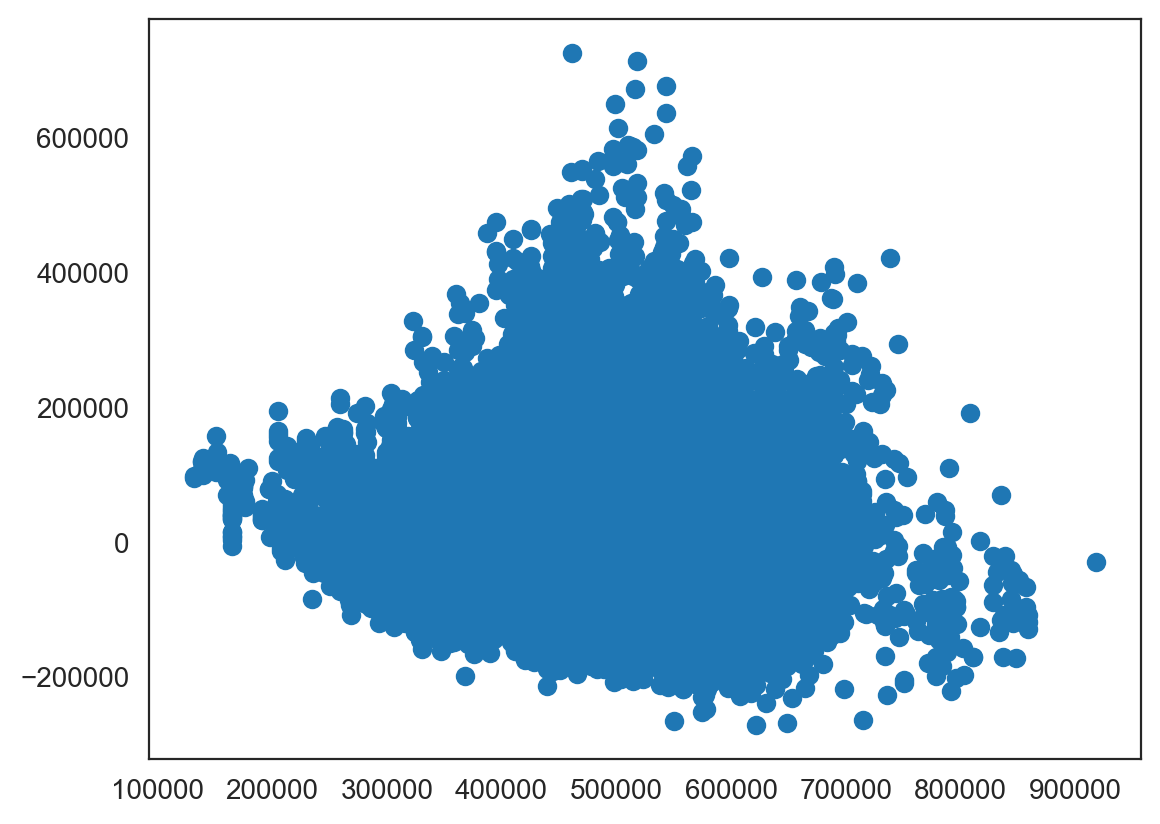

In [50]:
plt.scatter(y_pred, lr_residuals)

### Ridge CV Modelling

In [51]:
# Set up a list of ridge alphas to check:
r_alphas = np.logspace(0, 5, 100)

# Instantiate the model & fit:
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=10)
ridge_cv = ridge_cv.fit(Z_train, y_train)

# Evaluate model:
print(f'The ridge_cv R2 score for the train set is {ridge_cv.score(Z_train, y_train)}.')
print(f'The ridge_cv R2 score for the test set is {ridge_cv.score(Z_test, y_test)}.')
print(f'The ridge_cv CV score for the train set is {cross_val_score(ridge_cv, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred=ridge_cv.predict(Z_test)
y_pred_train=ridge_cv.predict(Z_train)

print(f'The ridge_cv prediction for the test set is {y_pred.mean()}.')
print(f'The ridge_cv prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
ridgecv_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The ridge_cv RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The ridge_cv RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The ridge_cv R2 score for the train set is 0.47742179460252687.
The ridge_cv R2 score for the test set is 0.48118137951622875.
The ridge_cv CV score for the train set is 0.4773247456018441.
The ridge_cv prediction for the test set is 448088.11506456154.
The ridge_cv prediction for the train set is 449417.3612598439.
The ridge_cv RMSE for the test set is 102854.32893411082.
The ridge_cv RMSE for the train set is 103687.49714018182.


In [52]:
ridge_cv.coef_

array([ 98769.20208921,   7554.60375765,   4626.90876832, -21507.73152465,
       -19492.91116802,  -8369.47373102])

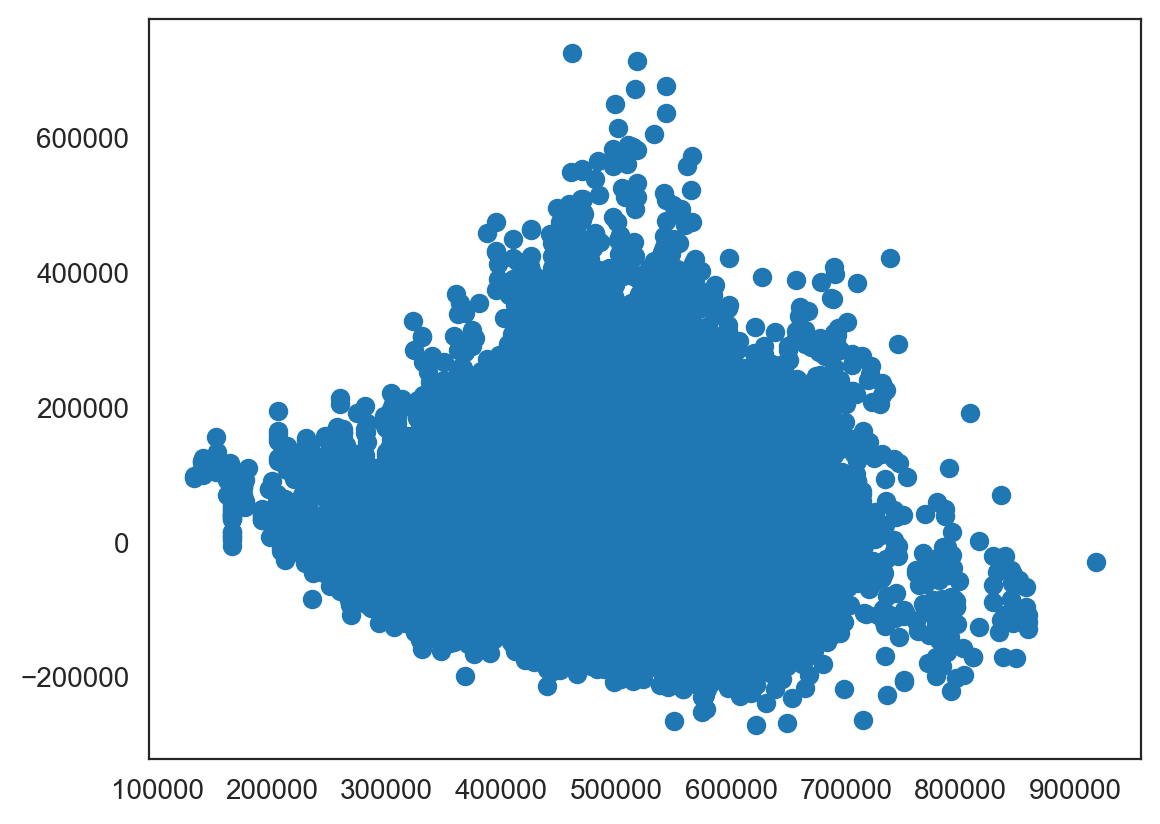

In [53]:
plt.scatter(y_pred, ridgecv_residuals)

### Lasso CV Modelling

In [54]:
# Set up a list of Lasso alphas to check:
l_alphas = np.logspace(-3, 0, 100)

# Instantiate the model & fit:
lasso_cv = LassoCV(alphas=l_alphas, cv=10, max_iter=50000)
lasso_cv.fit(Z_train, y_train);

# Evaluate model:
print(f'The lasso_cv R2 score for the train set is {lasso_cv.score(Z_train, y_train)}.')
print(f'The lasso_cv R2 score for the test set is {lasso_cv.score(Z_test, y_test)}.')
print(f'The lasso_cv CV score for the train set is {cross_val_score(lasso_cv, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred=lasso_cv.predict(Z_test)
y_pred_train=lasso_cv.predict(Z_train)

print(f'The lasso_cv prediction for the test set is {y_pred.mean()}.')
print(f'The lasso_cv prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
lasso_cv_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The lasso_cv RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The lasso_cv RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The lasso_cv R2 score for the train set is 0.4774218217040811.
The lasso_cv R2 score for the test set is 0.48118143554248105.
The lasso_cv CV score for the train set is 0.4773245298626591.
The lasso_cv prediction for the test set is 448087.8020586821.
The lasso_cv prediction for the train set is 449417.3612598438.
The lasso_cv RMSE for the test set is 102854.32338058739.
The lasso_cv RMSE for the train set is 103687.49445150064.


In [55]:
lasso_cv.coef_

array([ 98791.77443761,   7556.71337185,   4627.23011832, -21512.13123641,
       -19500.17134125,  -8370.22751205])

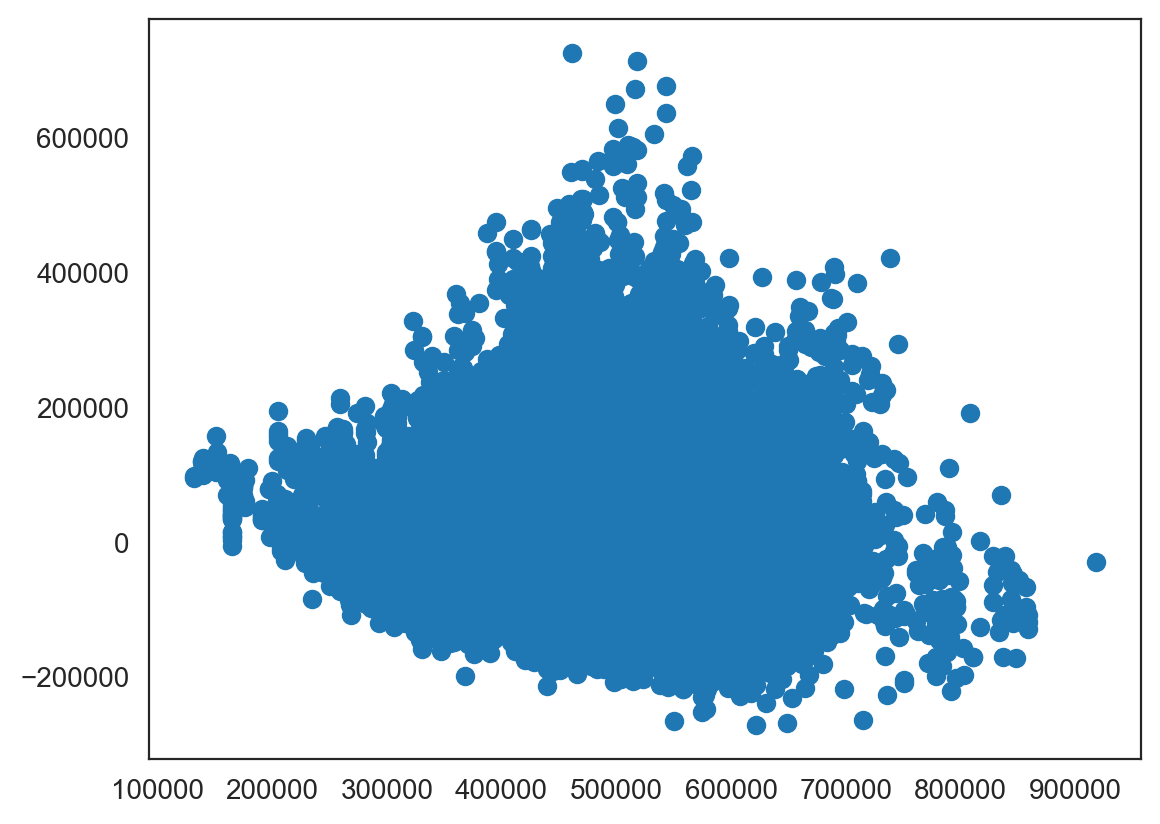

In [56]:
plt.scatter(y_pred, lasso_cv_residuals)

### ElasticNet Modelling

In [57]:
# Set up a list of alphas to check:
enet_alphas = np.linspace(0.5, 1.0, 100)
enet_ratio = 0.5

# Instantiate the model & fit:
enet = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)
enet = enet.fit(Z_train, y_train)

# Evaluate model:
print(f'The enet R2 score for the train set is {enet.score(Z_train, y_train)}.')
print(f'The enet R2 score for the test set is {enet.score(Z_test, y_test)}.')
print(f'The enet CV score for the train set is {cross_val_score(enet, Z_train, y_train,cv=10).mean()}.')

# Generate predictions:
y_pred=enet.predict(Z_test)
y_pred_train=enet.predict(Z_train)

print(f'The enet prediction for the test set is {y_pred.mean()}.')
print(f'The enet prediction for the train set is {y_pred_train.mean()}.')

# Residual errors:
enet_residuals = y_test - y_pred

# RMSE for test & train:
metrics.mean_squared_error(y_test, y_pred,squared=False)
metrics.mean_squared_error(y_train, y_pred_train,squared=False)

print(f'The enet RMSE for the test set is {metrics.mean_squared_error(y_test, y_pred,squared=False)}.')
print(f'The enet RMSE for the train set is {metrics.mean_squared_error(y_train, y_pred_train,squared=False)}.')

The enet R2 score for the train set is 0.45518626068602597.
The enet R2 score for the test set is 0.45889628069713606.
The enet CV score for the train set is 0.45513055531532753.
The enet prediction for the test set is 448386.78312672.
The enet prediction for the train set is 449417.361259844.
The enet RMSE for the test set is 105040.08324296746.
The enet RMSE for the train set is 105870.45278103653.


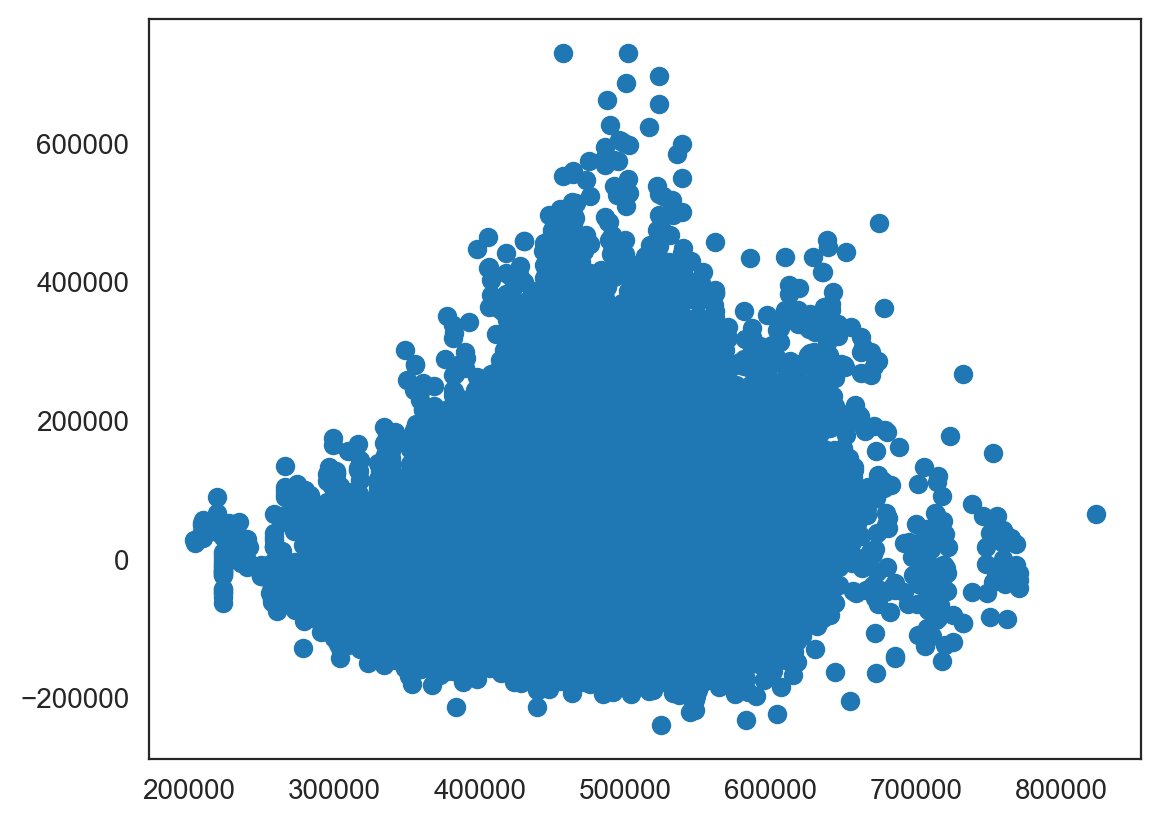

In [58]:
plt.scatter(y_pred, enet_residuals)

### Summmary of scores for the set features 2(sf3) `floor_area_sqft`,`pri_sch_nearest_distance`,`bus_stop_nearest_distance`,`mrt_nearest_distance`,`hawker_nearest_distance`,`mall_nearest_distance`:

Linear Regression
- The lr R2 score for the train set is 0.4774218218151932.
- The lr R2 score for the test set is 0.4811813774057705.
- The lr CV score for the train set is 0.4773246297790653.
- The lr prediction for the test set is 448087.7831320839.
- The lr prediction for the train set is 449417.3612598439.
- The lr RMSE for the test set is 102854.32914330701.
- The lr RMSE for the train set is 103687.49444047747.

RidgeCV
- The ridge_cv R2 score for the train set is 0.47742179460252687.
- The ridge_cv R2 score for the test set is 0.48118137951622875.
- The ridge_cv CV score for the train set is 0.4773247456018441.
- The ridge_cv prediction for the test set is 448088.11506456154.
- The ridge_cv prediction for the train set is 449417.3612598439.
- The ridge_cv RMSE for the test set is 102854.32893411082.
- The ridge_cv RMSE for the train set is 103687.49714018182.

LassoCV
- The lasso_cv R2 score for the train set is 0.4774218217040811.
- The lasso_cv R2 score for the test set is 0.48118143554248105.
- The lasso_cv CV score for the train set is 0.4773245298626591.
- The lasso_cv prediction for the test set is 448087.8020586821.
- The lasso_cv prediction for the train set is 449417.3612598438.
- The lasso_cv RMSE for the test set is 102854.32338058739.
- The lasso_cv RMSE for the train set is 103687.49445150064.

Elastic Net
- The enet R2 score for the train set is 0.45518626068602597.
- The enet R2 score for the test set is 0.45889628069713606.
- The enet CV score for the train set is 0.45513055531532753.
- The enet prediction for the test set is 448386.78312672.
- The enet prediction for the train set is 449417.361259844.
- The enet RMSE for the test set is 105040.08324296746.
- The enet RMSE for the train set is 105870.45278103653.

## In conclusion, the best model for sf3 is LassoCV for an r2 score at 0.48118137951622875.

# Determine baseline score on Kaggle 

In [59]:
hdb_prep_train = pd.read_csv('../datasets/cleaned_train.csv',low_memory=False)

In [60]:
baseline = hdb_prep_train['resale_price'].mean()
baseline

449161.50121307274

In [61]:
sample_sub = pd.read_csv('../datasets/sample_sub_reg.csv')

In [62]:
sample_sub[['Predicted']] = baseline

In [63]:
sample_sub[['Id','Predicted']].to_csv('submission_eli',index=False)

In [64]:
#save cleaned data into csv file
sample_sub[['Id','Predicted']].to_csv(path_or_buf='../datasets/submission_eli.csv',index=False, header = True)

### Kaggle baseline score after submission is 143338.63451.

# Kaggle Submission

### Apply ML model to cleaned_test.csv file and beat the above kaggle baseline score.

In [15]:
ml_test = pd.read_csv('../datasets/cleaned_ml_test.csv')

In [16]:
ml_test.head(2)

id  floor_area_sqft  hdb_age  mall_nearest_distance  \
0  114982          904.176       34             877.431572   
1   95653         1205.568       13             534.037705   

   hawker_nearest_distance  mrt_nearest_distance  bus_stop_nearest_distance  \
0               687.576779            686.660434                  75.683952   
1              2122.346226            169.478175                  88.993058   

   pri_sch_nearest_distance  sec_sch_nearest_dist  max_floor_lvl  ...  \
0                426.467910            156.322353             12  ...   
1                439.756851            739.371688             14  ...   

   storey_range_25 TO 27  storey_range_26 TO 30  storey_range_28 TO 30  \
0                      0                      0                      0   
1                      0                      0                      0   

   storey_range_31 TO 33  storey_range_34 TO 36  storey_range_37 TO 39  \
0                      0                      0                      0   
1                      0                      0                      0   

   storey_range_40 TO 42  storey_range_43 TO 45  storey_range_46 TO 48  \
0                      0                      0                      0   
1                      0                      0                      0   

   storey_range_49 TO 51  
0                      0  
1                      0  

[2 rows x 63 columns]

In [17]:
#select features to apply model - similar to train_test set
sf2_ml_test=ml_test.drop(['mall_nearest_distance','hawker_nearest_distance','mrt_nearest_distance',
                          'mrt_nearest_distance','bus_stop_nearest_distance','pri_sch_nearest_distance','sec_sch_nearest_dist',
                          'max_floor_lvl'],axis='columns')

In [18]:
sf2_ml_test.shape

(16737, 56)

In [19]:
prediction = sc_sf2.transform(sf2_ml_test)

In [20]:
df_prediction=pd.Series(lr_sf2.predict(prediction),name = 'predicted')

In [21]:
result = pd.concat([ml_test['id'],df_prediction],axis=1)

In [22]:
result.reset_index(drop=True,inplace=True)

In [23]:
result.shape

(16737, 2)

In [24]:
result.head()

id      predicted
0  114982  334641.588466
1   95653  505366.083135
2   40303  338271.951269
3  109506  266881.165738
4  100149  448710.068280

In [25]:
#save cleaned data into csv file
result.to_csv(path_or_buf='../datasets/result_submission_dsif9_eliza_h.csv',index=False, header = True)

# Final Result
## Kaggle submission score is 60651.25501, which is less than the kaggle baseline score of 143338.63451.

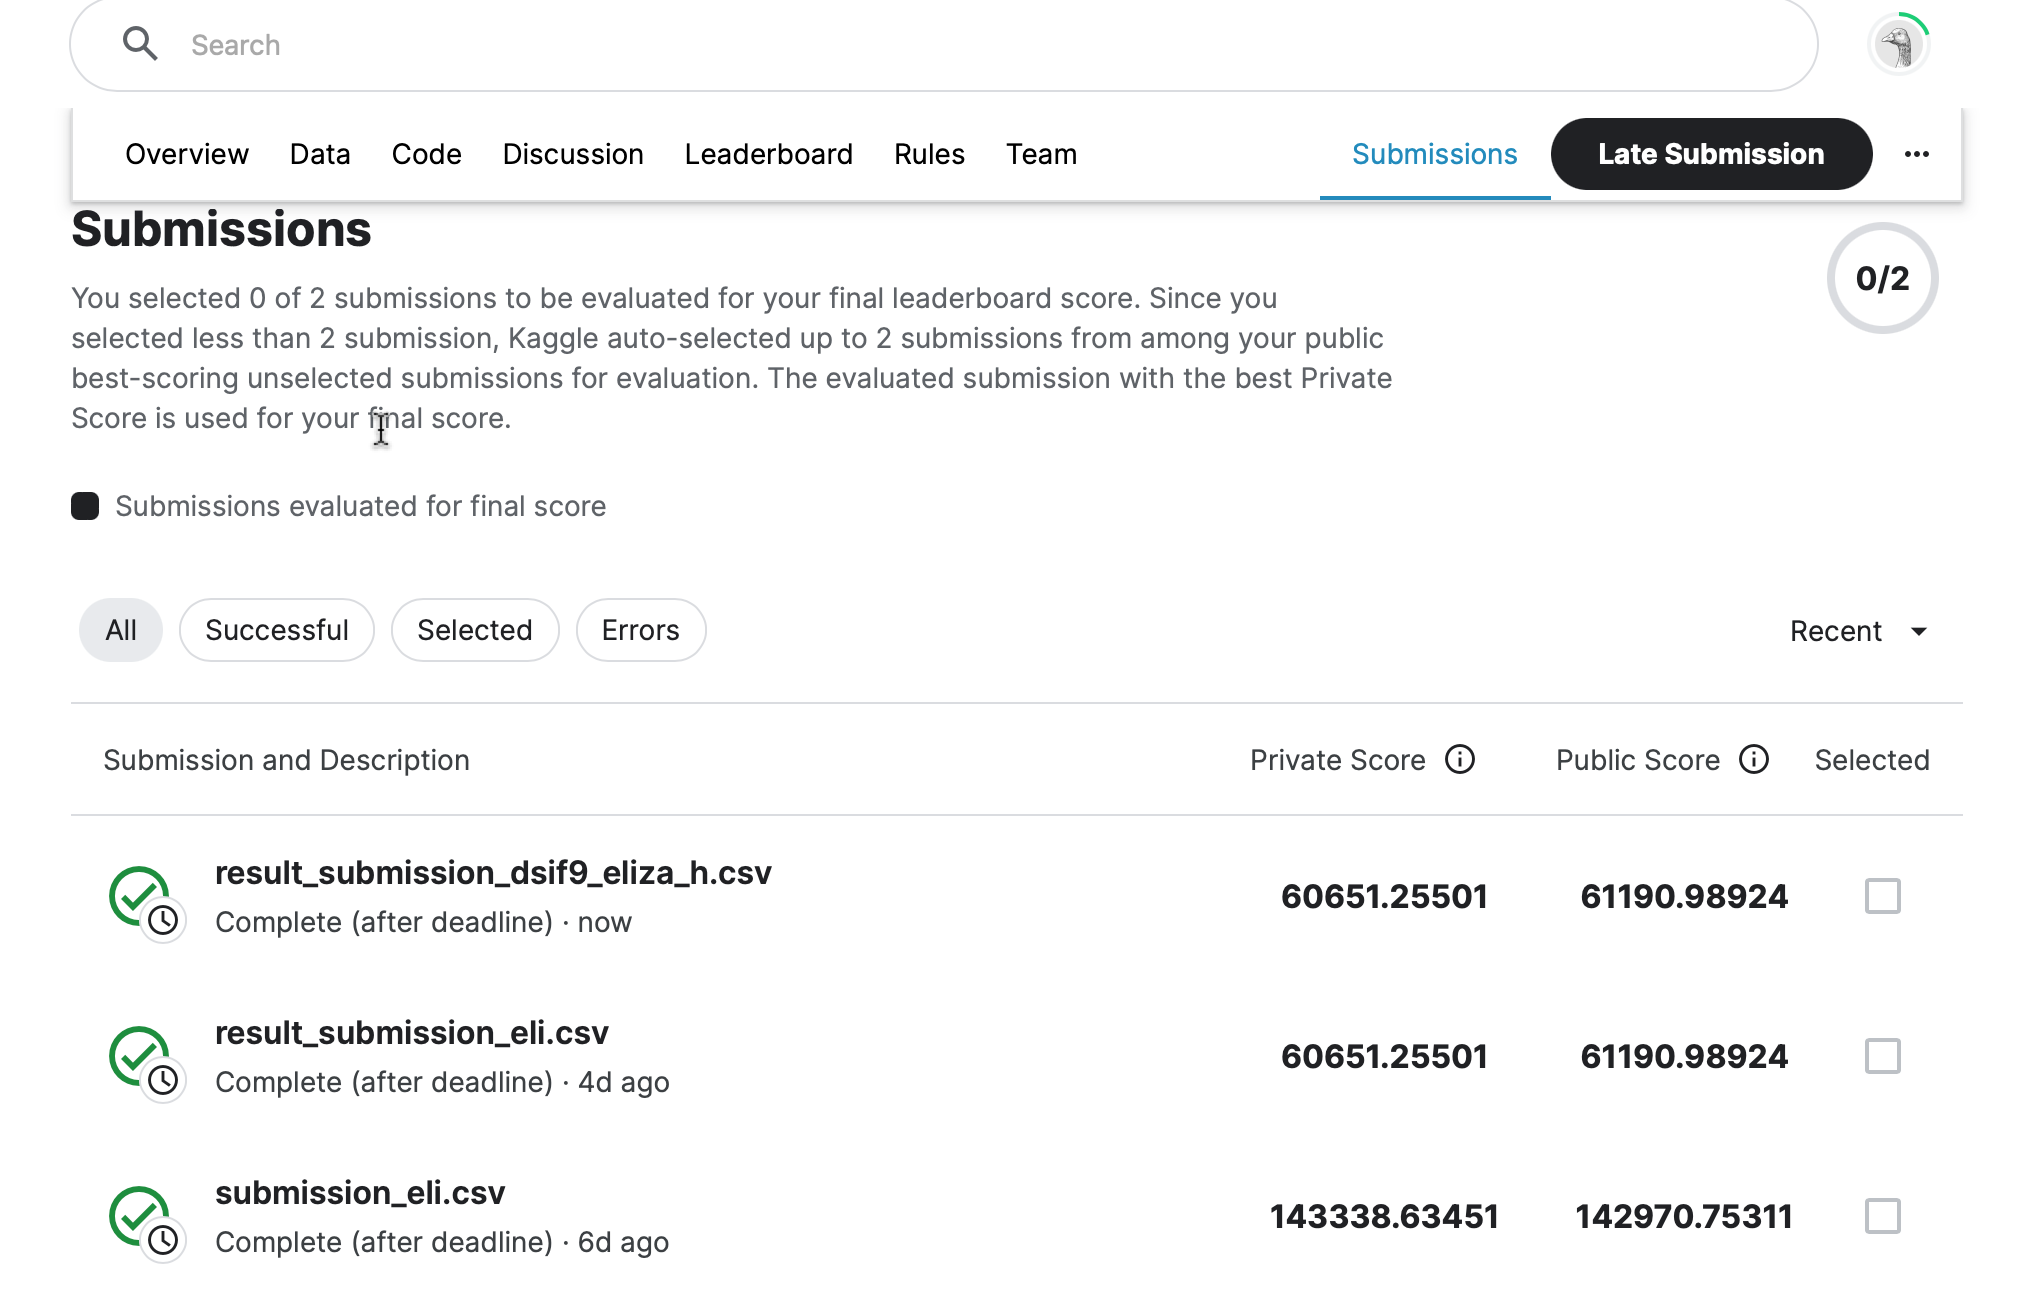

# Recommendations

Based on the predictive modelling for 4 models with varying sets of features, the model with these features - location by town, storey range, floor area and HDB age have a better price prediction. This corresponds to the inital analysis that these are the factors that most impact price. However, in relation to the problem statement, while there are significant factors that impact HDB resale price, relying solely on this dataset to inform the housing policy is naive. There are other considerating factors such as the private housing and BTO data sets, population growth, economic growth, and other social policies that are required before considering lowering the age for Singles to buy an HDB before 35 years old.